In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
import json
from sodapy import Socrata
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from country_list import countries_for_language
import unidecode
import matplotlib.font_manager
from collections import Counter
from itertools import groupby 
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/w2dt.mplstyle')
dp = [
    "#1c1c3c",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]
plt.rcParams['axes.grid'] = False
color = "#424630"

In [3]:
def load_colombia_df():
    client = Socrata("www.datos.gov.co", None)  # https://www.datos.gov.co/es/profile/edit/developer_settings   por si no funciona
    results = client.get("gt2j-8ykr", limit=1000000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [4]:
def load_muestras_df():
    client = Socrata("www.datos.gov.co", None)  # https://www.datos.gov.co/es/profile/edit/developer_settings   por si no funciona
    results = client.get("8835-5baf", limit=1000000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [5]:
df_boletines = pd.read_csv("julio11.csv")
df_boletines = df_boletines[df_boletines["Departamento"] == "antioquia" ]
df_boletines = df_boletines[df_boletines["fecha_boletin"] != "2020-07-11"]
df_boletines.head()

,Caso,Ciudad,Codigo departamento,Codigo municipio,Código País,Código ciudad,Código departamento,Departamento,Departamento.x,Edad,...,fecha_reporte_web,nom_grupo_,nombre_grupo_etnico,nombre_mun,pa_s_de_procedencia,per_etn_2,pertenencia etnica,pertenencia_etnica,tipo,tipo_recuperaci_n
0,3.0,Medellín,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Medellín,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,Medellín,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,Itagui,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,Medellín,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_col = load_colombia_df()

In [7]:
df_col.columns

Index(['id_de_caso', 'fecha_de_notificaci_n', 'c_digo_divipola',
       'ciudad_de_ubicaci_n', 'departamento', 'atenci_n', 'edad', 'sexo',
       'tipo', 'estado', 'pa_s_de_procedencia', 'fis', 'fecha_diagnostico',
       'fecha_recuperado', 'fecha_reporte_web', 'tipo_recuperaci_n',
       'codigo_departamento', 'codigo_pais', 'pertenencia_etnica',
       'nombre_grupo_etnico', 'fecha_de_muerte'],
      dtype='object')

In [8]:
df_muestras = load_muestras_df()
df_muestras

,fecha,acumuladas,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,...,vaupes,vichada,procedencia_desconocida,positivas_acumuladas,negativas_acumuladas,positividad_acumulada,indeterminadas,barranquilla,cartagena,santa_marta
0,Acumulado Feb,601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-05T00:00:00.000,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-06T00:00:00.000,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-07T00:00:00.000,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-08T00:00:00.000,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020-07-06T00:00:00.000,881190,11043,98370,2677,25313,261021,5505,15485,9602,...,1192,783,8741,156614,720727,"17,8",3849,75602,50804,16091
125,2020-07-07T00:00:00.000,902305,11046,101142,2783,25635,267888,5552,15595,9661,...,1192,783,8742,162134,736246,"18,0",3925,77237,51855,16567
126,2020-07-08T00:00:00.000,923714,11175,104385,2784,26059,272872,6133,15729,9730,...,1192,783,8742,167310,752402,"18,1",4002,80993,53406,16913
127,2020-07-09T00:00:00.000,945240,11249,106711,2998,26449,280355,6144,15896,9798,...,1192,794,8744,173208,767776,"18,3",4256,82807,54225,17933


In [9]:
def preprocess_df(df):
    df = df.rename(columns={"fecha_diagnostico": "Fecha de diagnóstico",
                            "ciudad_de_ubicaci_n": "ciudad",
                            "fecha_de_notificaci_n": "Fecha de notificacion",
                            "atenci_n": "atencion"})
    
    df["sexo"] = df["sexo"].str.upper()
    df["estado"] = df["estado"].str.upper()
    df["atencion"] = df["atencion"].str.upper()
    df["tipo"] = df["tipo"].str.upper()
    df["edad"] = df["edad"].astype(int)
    
    df["Fecha de diagnóstico"] = pd.to_datetime(df["Fecha de diagnóstico"], errors="coerce")
    df["fecha_reporte_web"] = pd.to_datetime(df["fecha_reporte_web"], errors="coerce")
    
    df["fecha_recuperado"] = pd.to_datetime(df["fecha_recuperado"], errors="coerce")
    df["fecha_de_muerte"] = pd.to_datetime(df["fecha_de_muerte"], errors="coerce")
    df.loc[df["fis"]=="Asintomático", "estado"] = "ASINTOMATICO"
    df["fis"] = pd.to_datetime(df["fis"], errors="coerce")
    df["tiempo recuperacion"] = df["fecha_recuperado"] - df["fis"]
    df["tiempo recuperacion"] = df["tiempo recuperacion"].dt.days
    
    df["tiempo muerte"] = df["fecha_de_muerte"] - df["fis"]
    df["tiempo muerte"] = df["tiempo muerte"].dt.days
    return df

In [10]:
df_col = preprocess_df(df_col)

In [11]:
df_ant = df_col[df_col["departamento"] == "Antioquia"]

In [12]:
df_ant

,id_de_caso,Fecha de notificacion,c_digo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,...,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,tiempo recuperacion,tiempo muerte
2,3,2020-03-07T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,50,F,IMPORTADO,LEVE,...,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,15.0,NaN
3,4,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,55,M,RELACIONADO,LEVE,...,2020-03-26,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,20.0,NaN
4,5,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,25,M,RELACIONADO,LEVE,...,2020-03-23,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,15.0,NaN
5,6,2020-03-10T00:00:00.000,05360,Itagüí,Antioquia,RECUPERADO,27,F,RELACIONADO,LEVE,...,2020-03-26,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,20.0,NaN
19,20,2020-03-11T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,26,F,RELACIONADO,LEVE,...,2020-03-24,2020-03-14,PCR,5,NaN,Otro,NaN,NaT,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137742,137783,2020-06-30T00:00:00.000,05001,Medellín,Antioquia,CASA,16,F,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
137751,137792,2020-07-03T00:00:00.000,05266,Envigado,Antioquia,CASA,35,M,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
137778,137819,2020-06-26T00:00:00.000,05212,Copacabana,Antioquia,CASA,13,F,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
137779,137820,2020-06-24T00:00:00.000,05045,Apartadó,Antioquia,CASA,26,F,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN


## Generales

In [13]:
df_ant["atencion"].value_counts()

CASA            5252
RECUPERADO      2671
HOSPITAL         398
FALLECIDO         71
HOSPITAL UCI      53
N/A                6
Name: atencion, dtype: int64

In [14]:
max_day = df_ant["fecha_reporte_web"].max()
ultimo_dia = df_ant[df_ant["fecha_reporte_web"] == max_day]
nuevos_inf = ultimo_dia.shape[0]
nuevos_muertos = df_ant[df_ant["fecha_de_muerte"] == "2020-06-13"].shape[0]
nuevos_recuperados = df_ant[df_ant["fecha_recuperado"] == "2020-06-13"].shape[0]

infectados_totales = df_ant.shape[0]

recuperados_totales = df_ant["atencion"].value_counts()["RECUPERADO"]
fallecidos_totales = df_ant["atencion"].value_counts()["FALLECIDO"]
uci = df_ant["atencion"].value_counts()["HOSPITAL UCI"]
hospital = df_ant["atencion"].value_counts()["HOSPITAL"]
activos_totales = df_ant[df_ant["atencion"].isin(["CASA", "HOSPITAL", "HOSPITAL UCI"])].shape[0]

print(f"""
nuevos infectados: {nuevos_inf}
nuevos muertos: {nuevos_muertos}
nuevos recuperados: {nuevos_recuperados}
infectados totales: {infectados_totales}
recuperados totales: {recuperados_totales}
fallecidos totales: {fallecidos_totales}
uci: {uci}
hospital: {hospital}
activos totales: {activos_totales}
""")


nuevos infectados: 626
nuevos muertos: 0
nuevos recuperados: 33
infectados totales: 8451
recuperados totales: 2671
fallecidos totales: 71
uci: 53
hospital: 398
activos totales: 5703



In [15]:
last_date = df_boletines["fecha_boletin"].max()
df_boletines[df_boletines["fecha_boletin"] == last_date]

,Caso,Ciudad,Codigo departamento,Codigo municipio,Código País,Código ciudad,Código departamento,Departamento,Departamento.x,Edad,...,fecha_reporte_web,nom_grupo_,nombre_grupo_etnico,nombre_mun,pa_s_de_procedencia,per_etn_2,pertenencia etnica,pertenencia_etnica,tipo,tipo_recuperaci_n
139239,3.0,5001,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,50,...,NaN,NaN,NaN,Medellín,NaN,Otro,NaN,NaN,NaN,NaN
139240,4.0,5001,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,55,...,NaN,NaN,NaN,Medellín,NaN,Otro,NaN,NaN,NaN,NaN
139241,5.0,5001,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,25,...,NaN,NaN,NaN,Medellín,NaN,Otro,NaN,NaN,NaN,NaN
139242,6.0,5360,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,27,...,NaN,NaN,NaN,Itagüí,NaN,Otro,NaN,NaN,NaN,NaN
139243,20.0,5001,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,26,...,NaN,NaN,NaN,Medellín,NaN,Otro,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146480,127065.0,5088,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,15,...,NaN,NaN,NaN,Bello,NaN,NaN,NaN,NaN,NaN,NaN
146481,127066.0,5088,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,24,...,NaN,NaN,NaN,Bello,NaN,NaN,NaN,NaN,NaN,NaN
146482,127067.0,5001,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,53,...,NaN,NaN,NaN,Medellín,NaN,NaN,NaN,NaN,NaN,NaN
146483,127069.0,5001,NaN,NaN,NaN,NaN,NaN,antioquia,NaN,66,...,NaN,NaN,NaN,Medellín,NaN,NaN,NaN,NaN,NaN,NaN


## Infectados

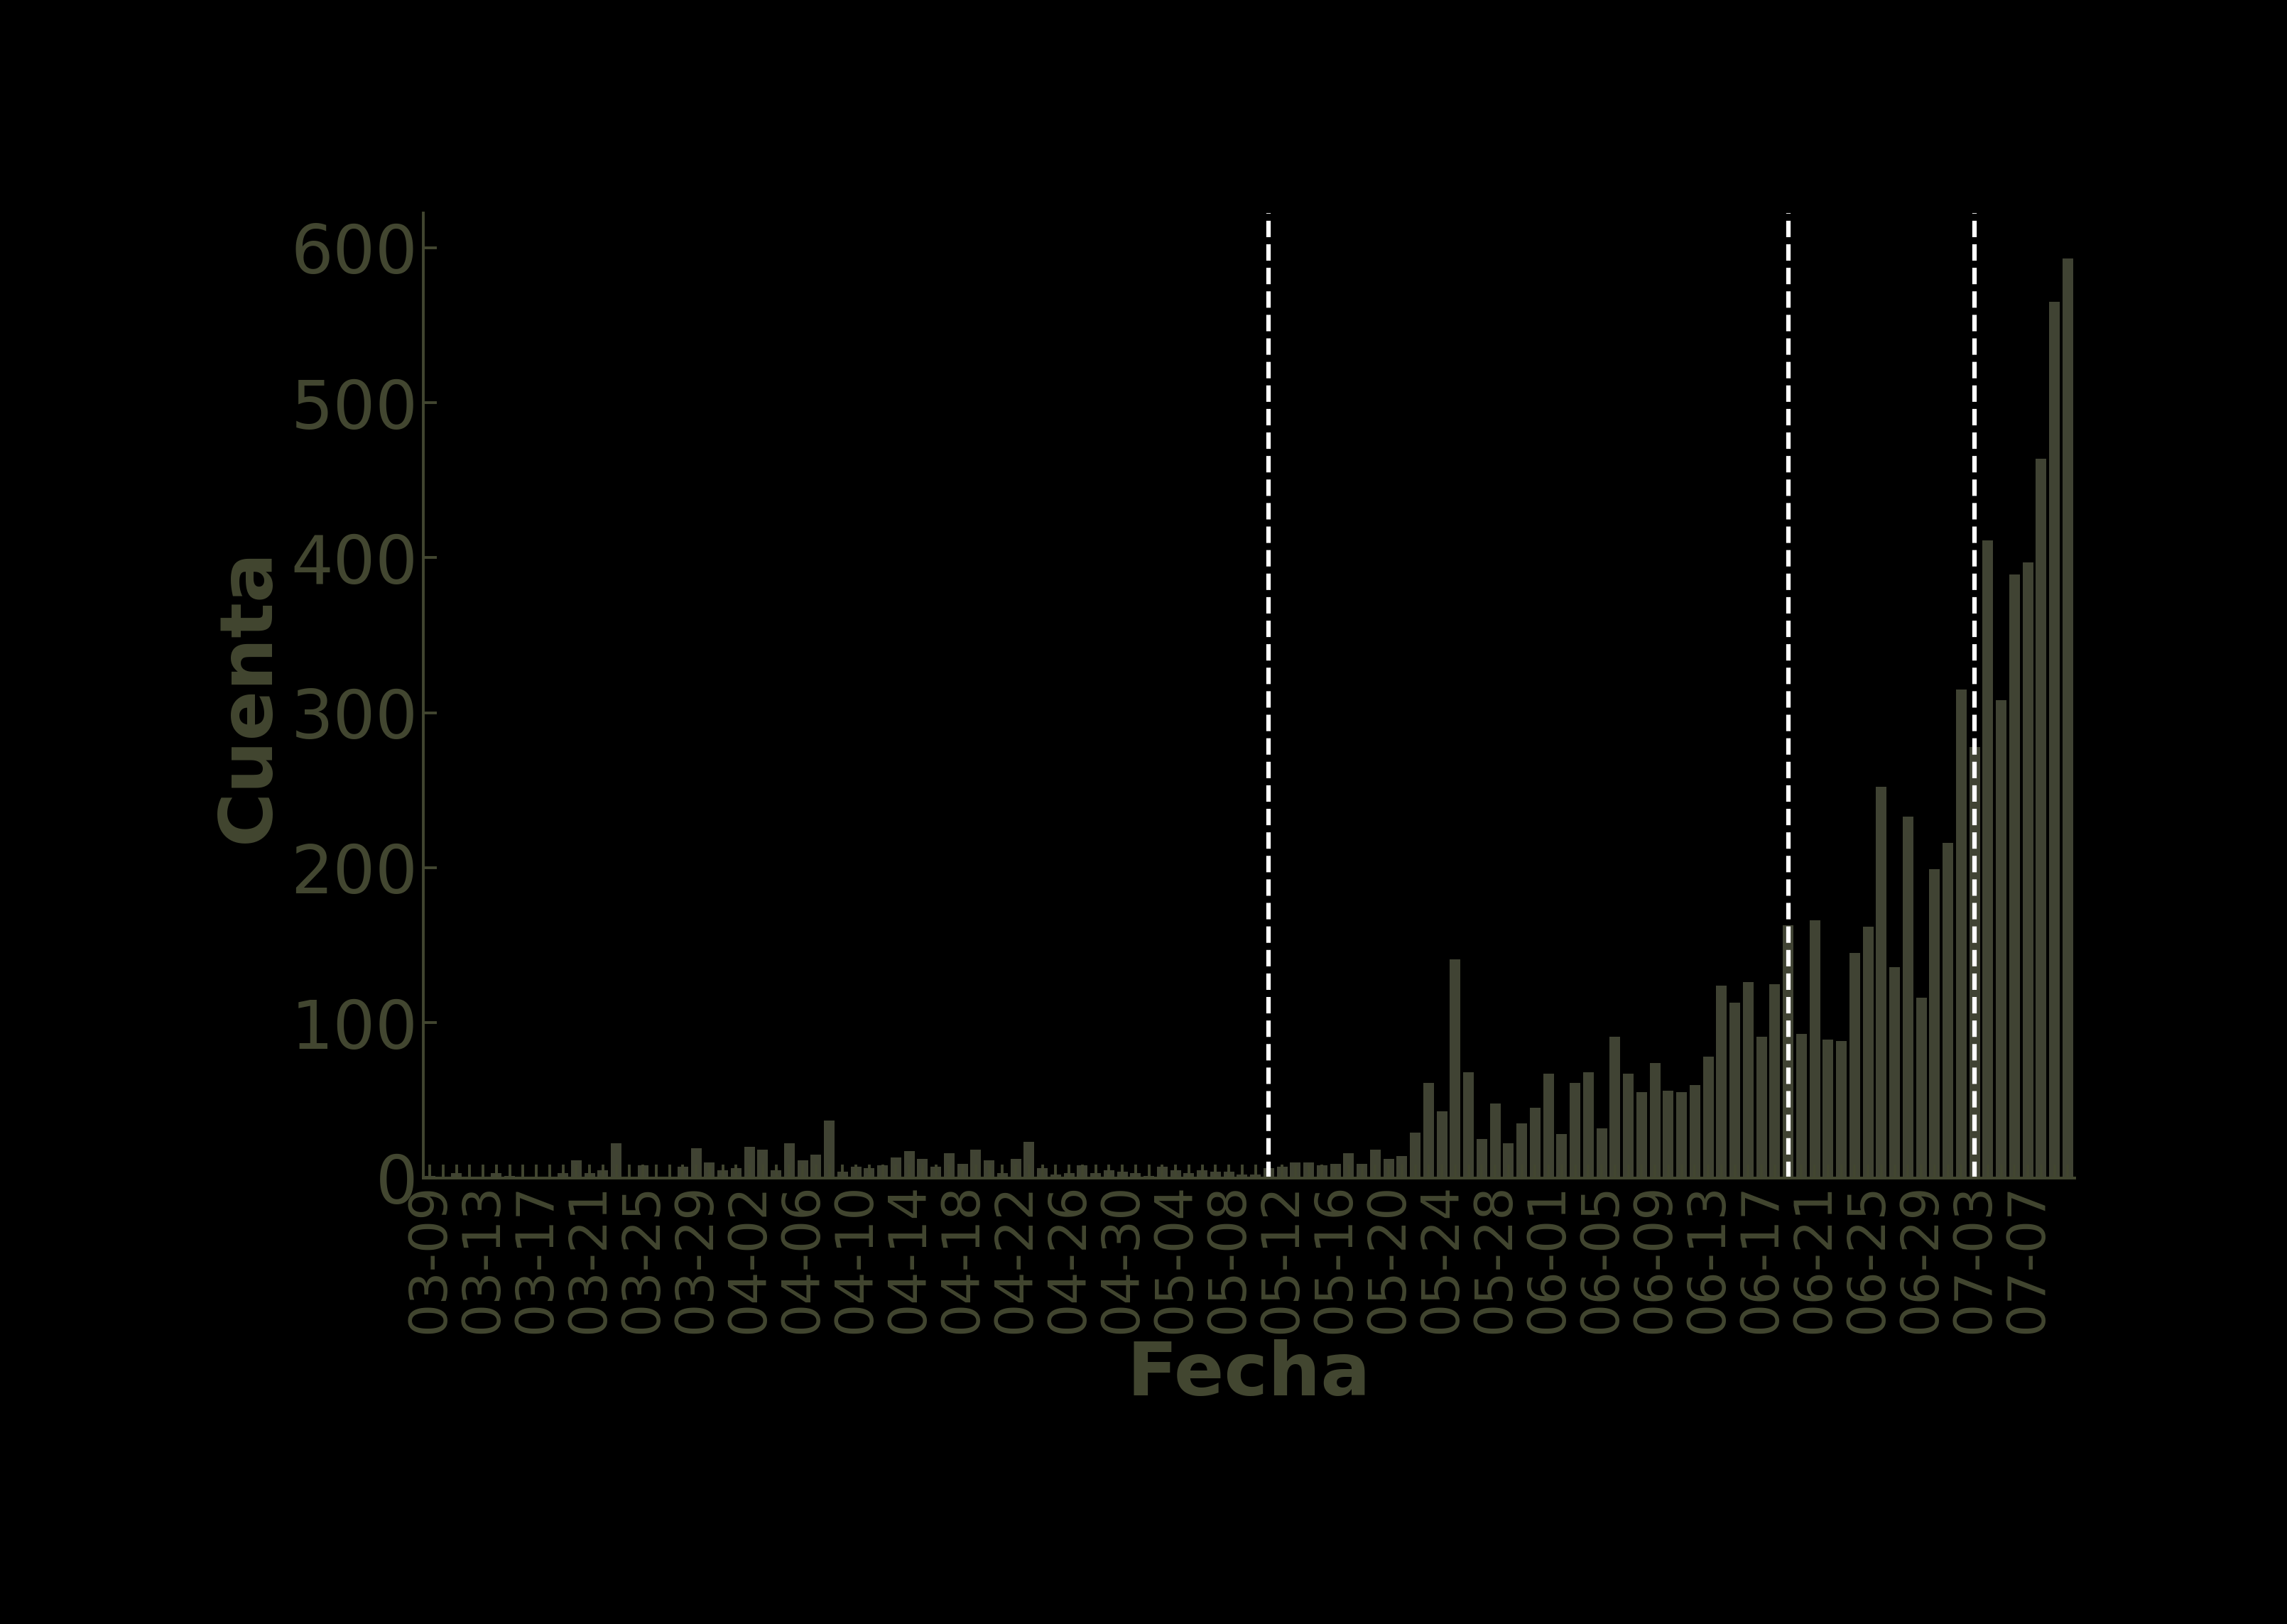

In [16]:
fecha_tipo = "Fecha de diagnóstico"

cuenta = pd.DataFrame(df_ant.groupby(fecha_tipo)["id_de_caso"].count()).reset_index()
cuenta = cuenta.rename(columns={"id_de_caso":"cuenta"})
idx = pd.date_range(cuenta[fecha_tipo].min(), cuenta[fecha_tipo].max())
all_dates = pd.DataFrame(idx, columns=["fecha"])
cuenta = all_dates.merge(cuenta, left_on="fecha", 
                right_on=fecha_tipo, 
                how="left").drop(fecha_tipo, axis=1).fillna(0)
cuenta["fecha"] = cuenta["fecha"].dt.strftime('%m-%d')


plt.rcParams['axes.labelweight'] = 'bold'
cuenta_plot = cuenta.reset_index(drop=True)
sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha", y="cuenta", data=cuenta_plot, color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

plt.setp(ax.spines.values(), color=color)

plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "07-03"].index[0], color="white", linestyle='--', linewidth=3)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)

for i,label in enumerate(ax.get_xticklabels()):
    if i%4 == 0:
        pass
    else:
        label.set_visible(False)



plt.savefig(f'confirmados_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Numero de pruebas 

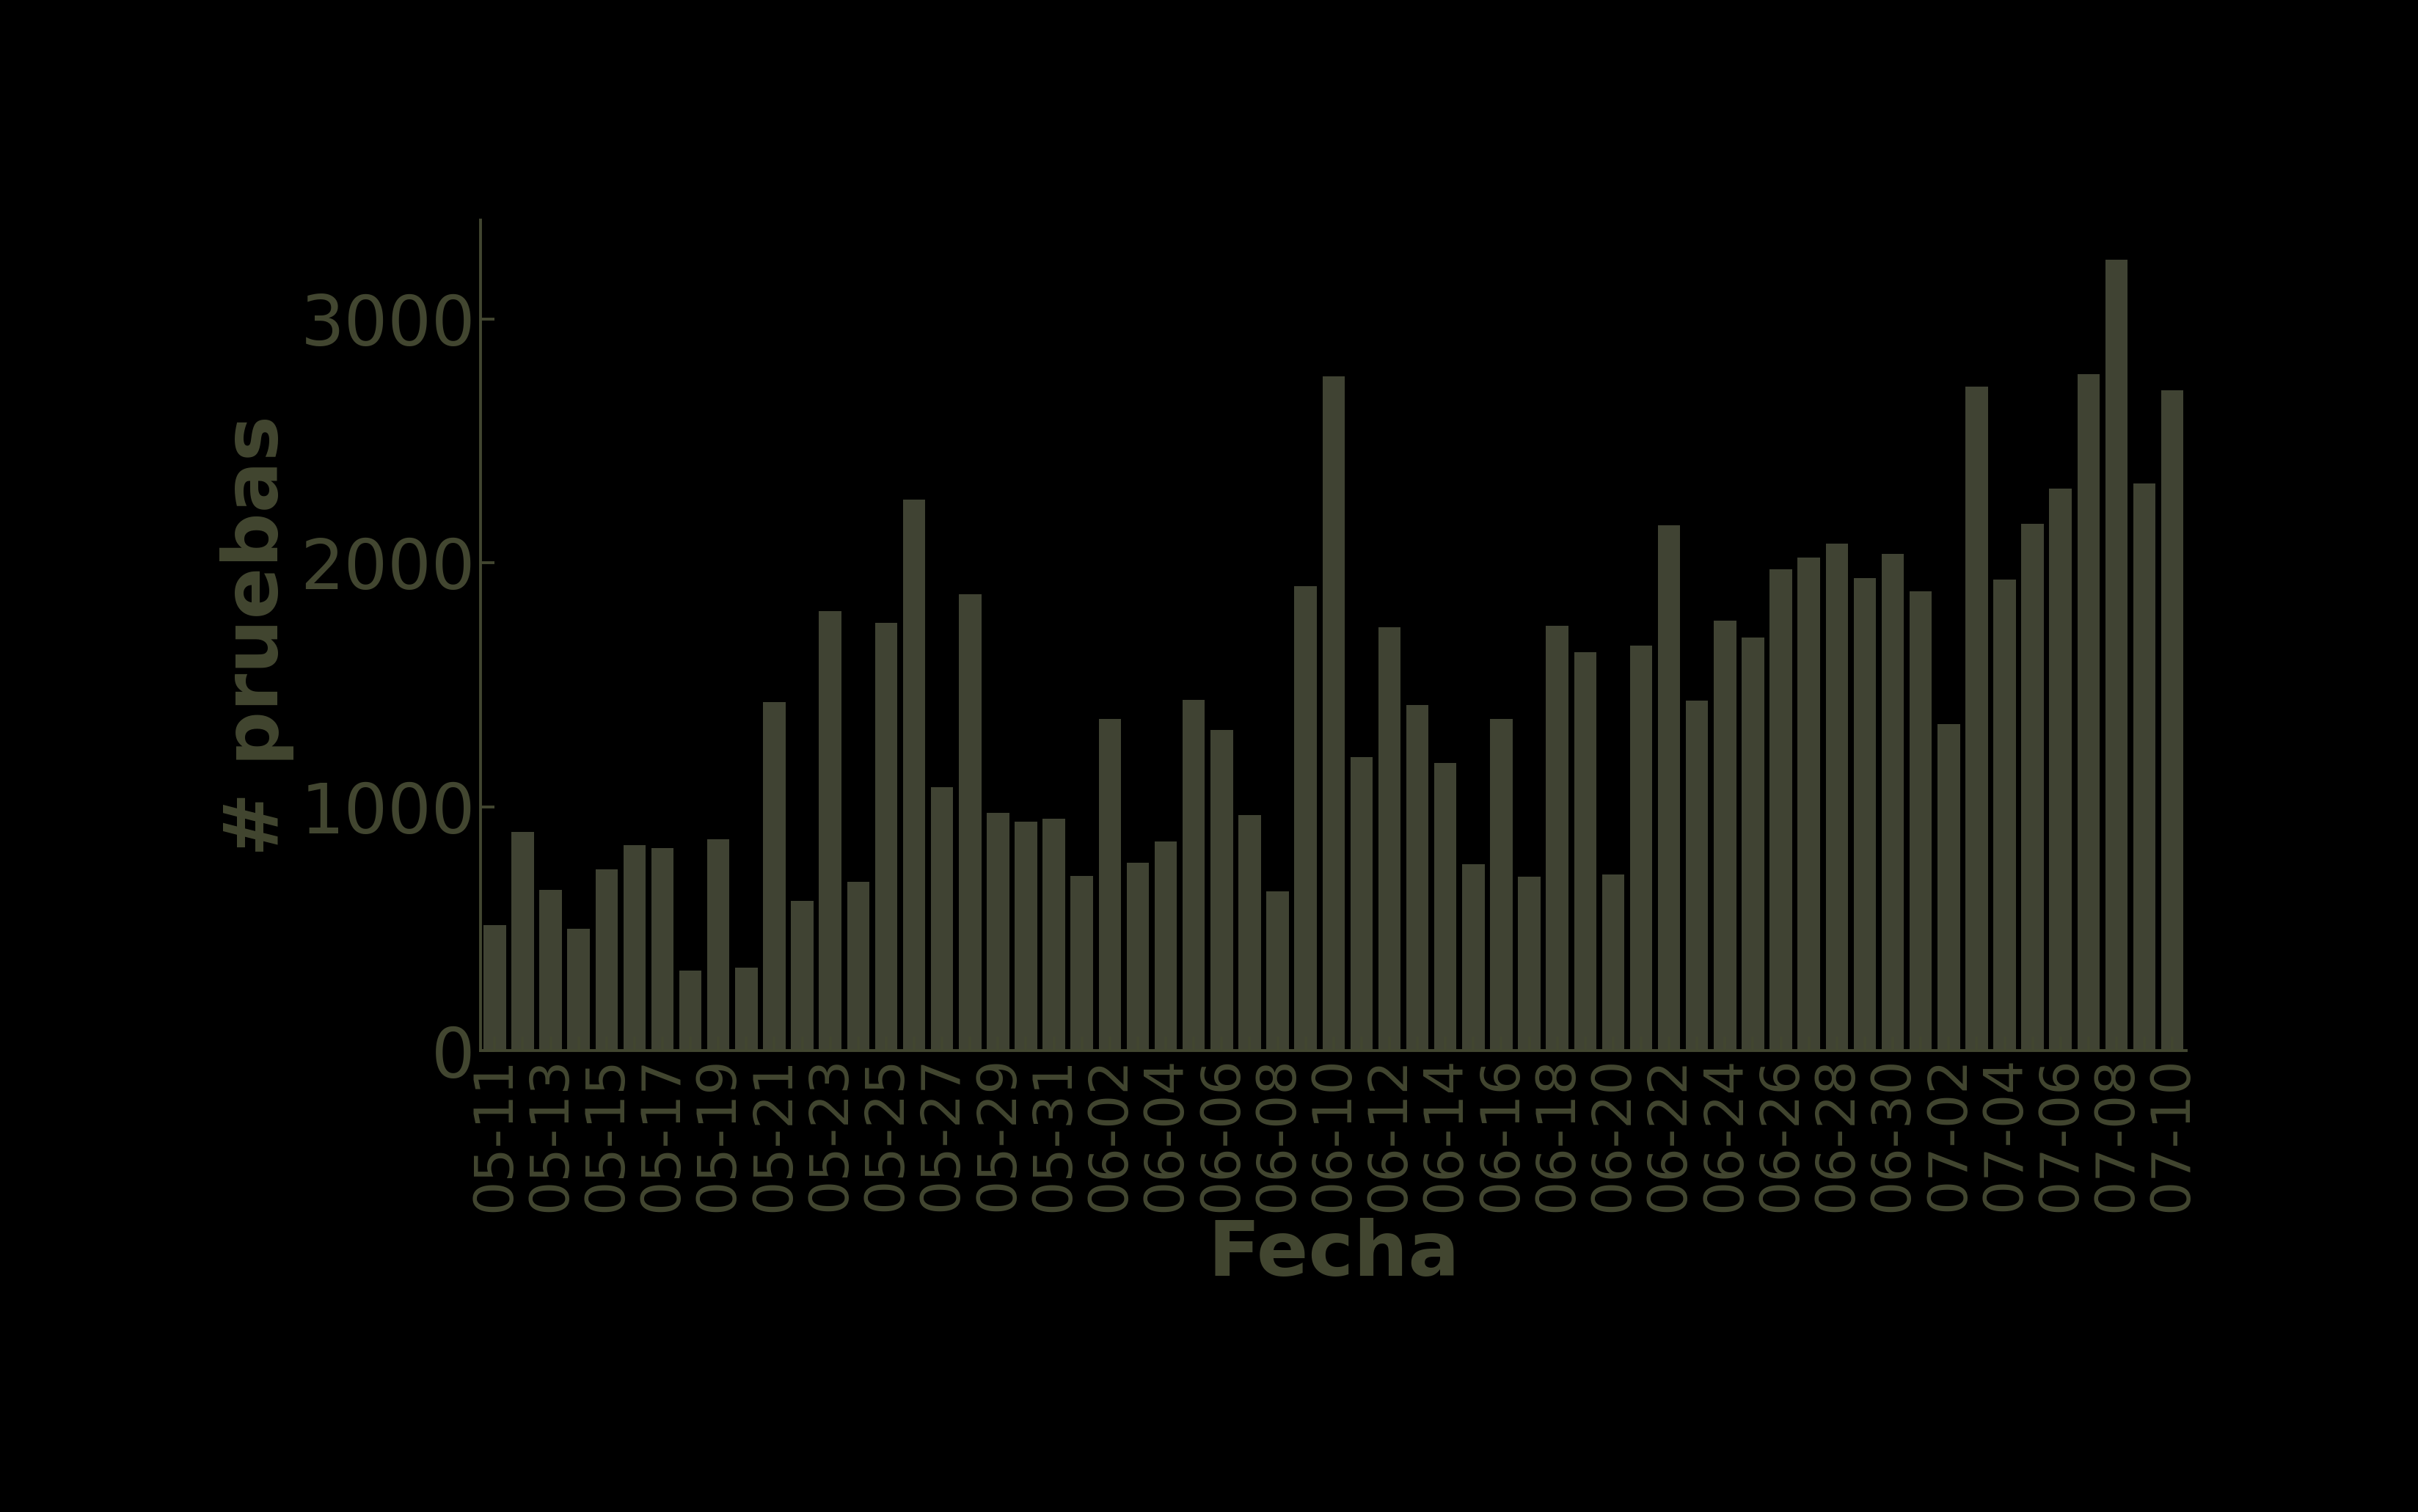

In [17]:
df_muestras_ant = df_muestras.loc[:,["fecha", "antioquia"]]
df_muestras_ant = df_muestras_ant[df_muestras_ant["antioquia"].notnull()]
df_muestras_ant["fecha"] = pd.to_datetime(df_muestras_ant["fecha"])
df_muestras_ant["fecha"] = df_muestras_ant["fecha"].dt.strftime('%m-%d')
df_muestras_ant["antioquia"] = df_muestras_ant["antioquia"].astype(int)
df_muestras_ant["cuenta"] = df_muestras_ant["antioquia"].diff()

plt.figure(figsize=(20,10))
ax = sns.barplot(x="fecha", y="cuenta", data=df_muestras_ant[1:], color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("# pruebas", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)

for i,label in enumerate(ax.get_xticklabels()):
    if i%2 == 0:
        pass
    else:
        label.set_visible(False)
        
plt.savefig(f'muestras_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Positivos por test

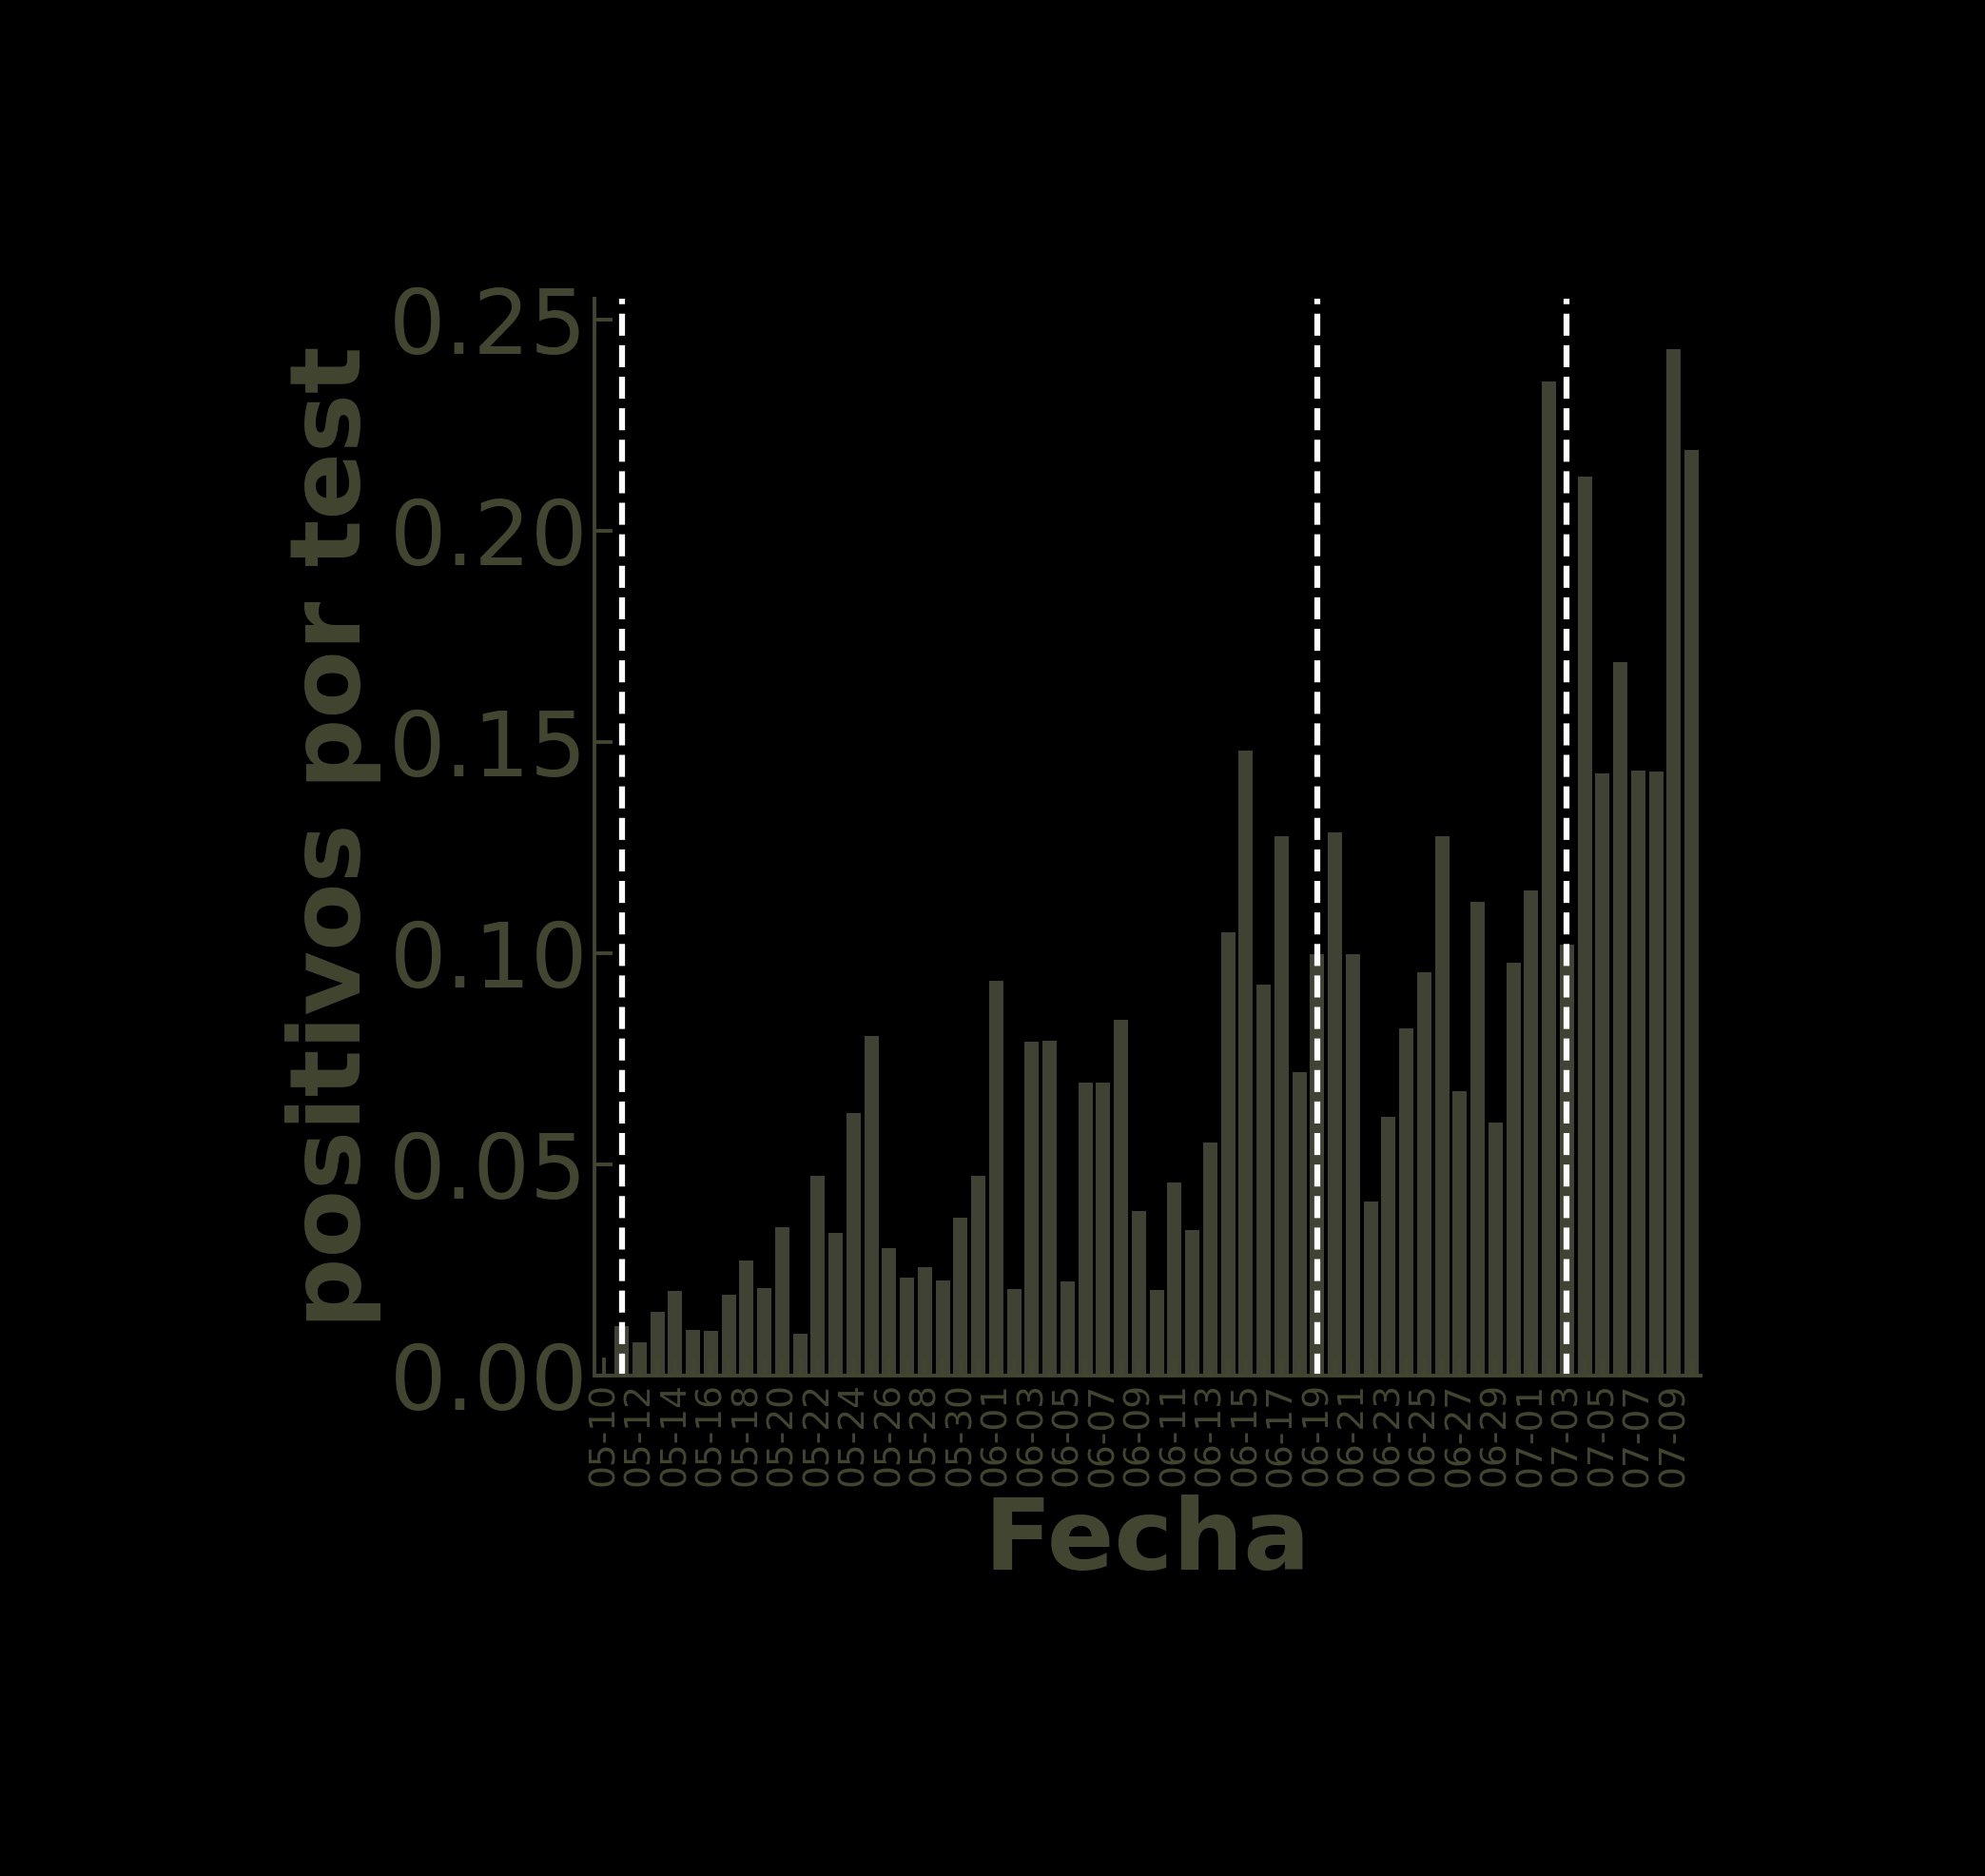

In [18]:
pxt = df_muestras_ant.merge(cuenta_plot, how="left", left_on="fecha", right_on="fecha").drop("antioquia", axis=1)
pxt["pxt"] = pxt["cuenta_y"] / pxt["cuenta_x"]
ax = sns.barplot(x="fecha", y="pxt", data=pxt, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=18, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("positivos por test", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)

plt.axvline(pxt[pxt["fecha"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(pxt[pxt["fecha"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(pxt[pxt["fecha"] == "07-03"].index[0], color="white", linestyle='--', linewidth=3)

for i,label in enumerate(ax.get_xticklabels()):
    if i%2 == 0:
        pass
    else:
        label.set_visible(False)
        
plt.savefig(f'pxt.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Activos

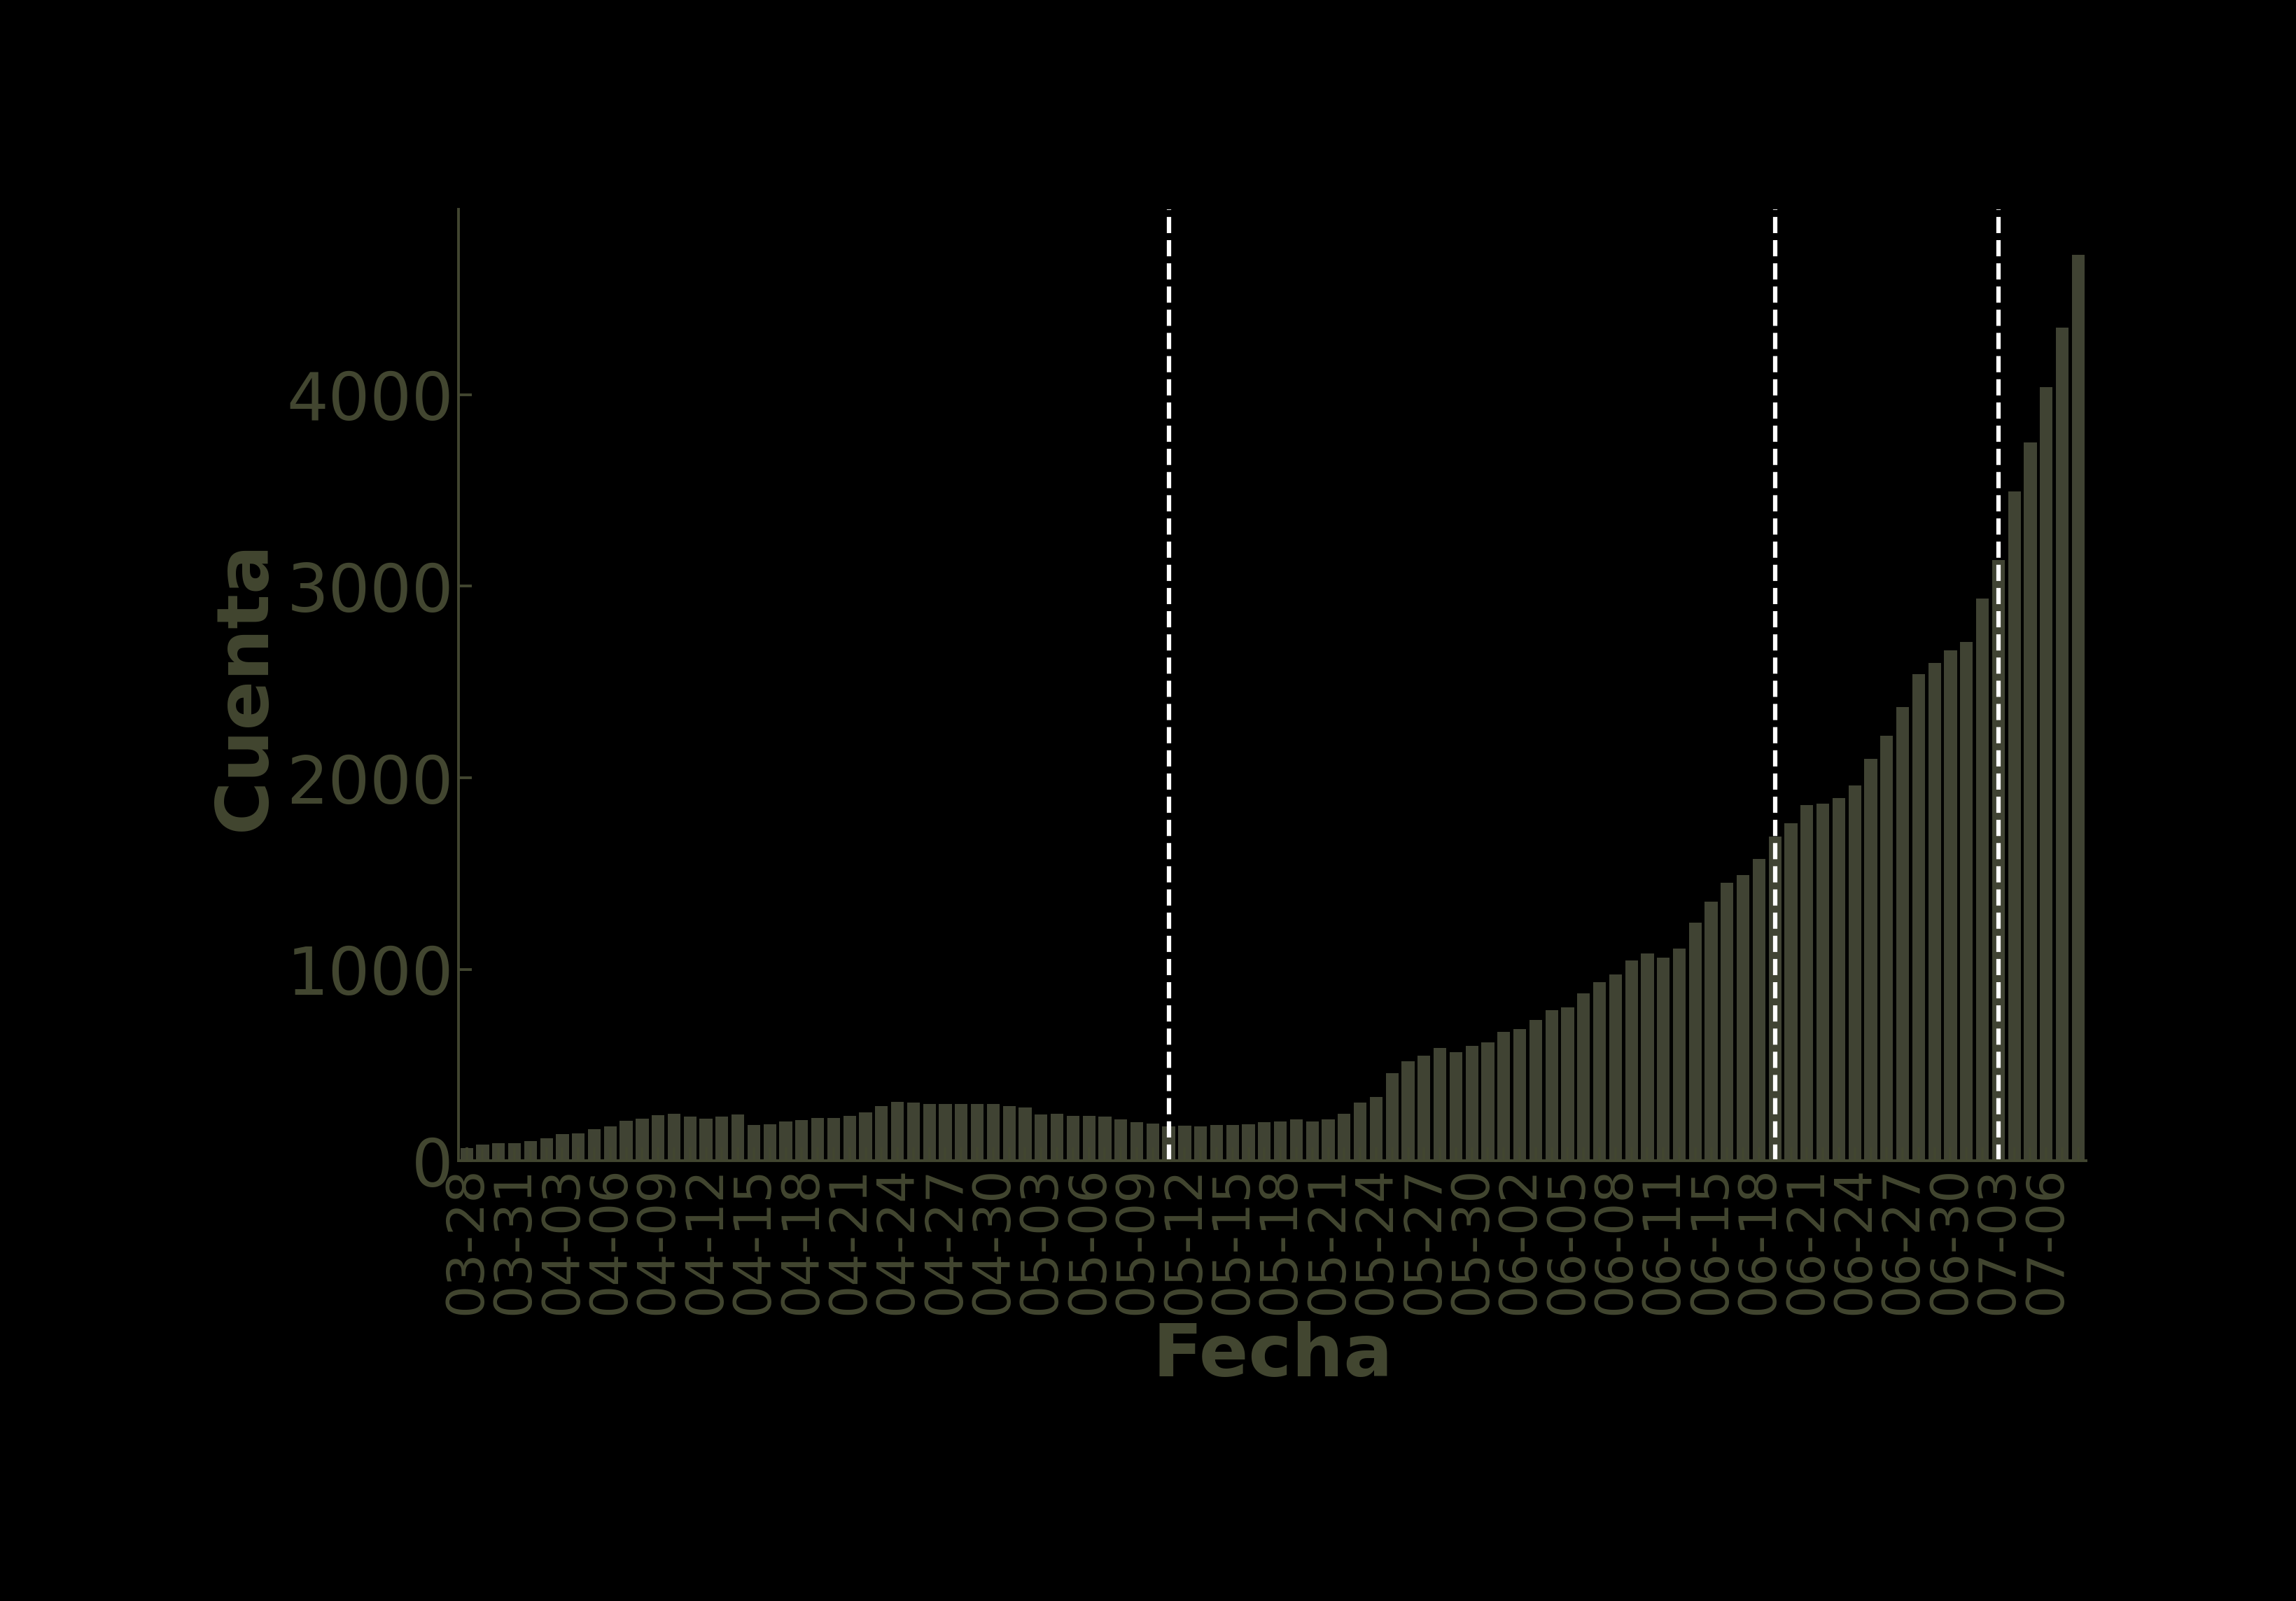

In [19]:
activos = ['casa', 'hospital UCI', 'hospital', 'En casa',
       'Hospital UCI', 'Hospital', 'Casa',
       'Casa  ', 'Hospital UCI ']
df_activos = df_boletines[df_boletines["Ubicación"].isin(activos)]
df_activos.tail()

cuenta = df_activos.groupby("fecha_boletin").size().to_frame("cuenta").reset_index()
cuenta["fecha_boletin"] = pd.to_datetime(cuenta["fecha_boletin"])
cuenta["fecha_boletin"] = cuenta["fecha_boletin"].dt.strftime('%m-%d')
cuenta["cambio_activos"] = cuenta["cuenta"].diff()

sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha_boletin", y="cuenta", data=cuenta, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(cuenta[cuenta["fecha_boletin"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta[cuenta["fecha_boletin"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta[cuenta["fecha_boletin"] == "07-03"].index[0], color="white", linestyle='--', linewidth=3)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)


for i,label in enumerate(ax.get_xticklabels()):
    if i%3 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'activos_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## cambio de activos

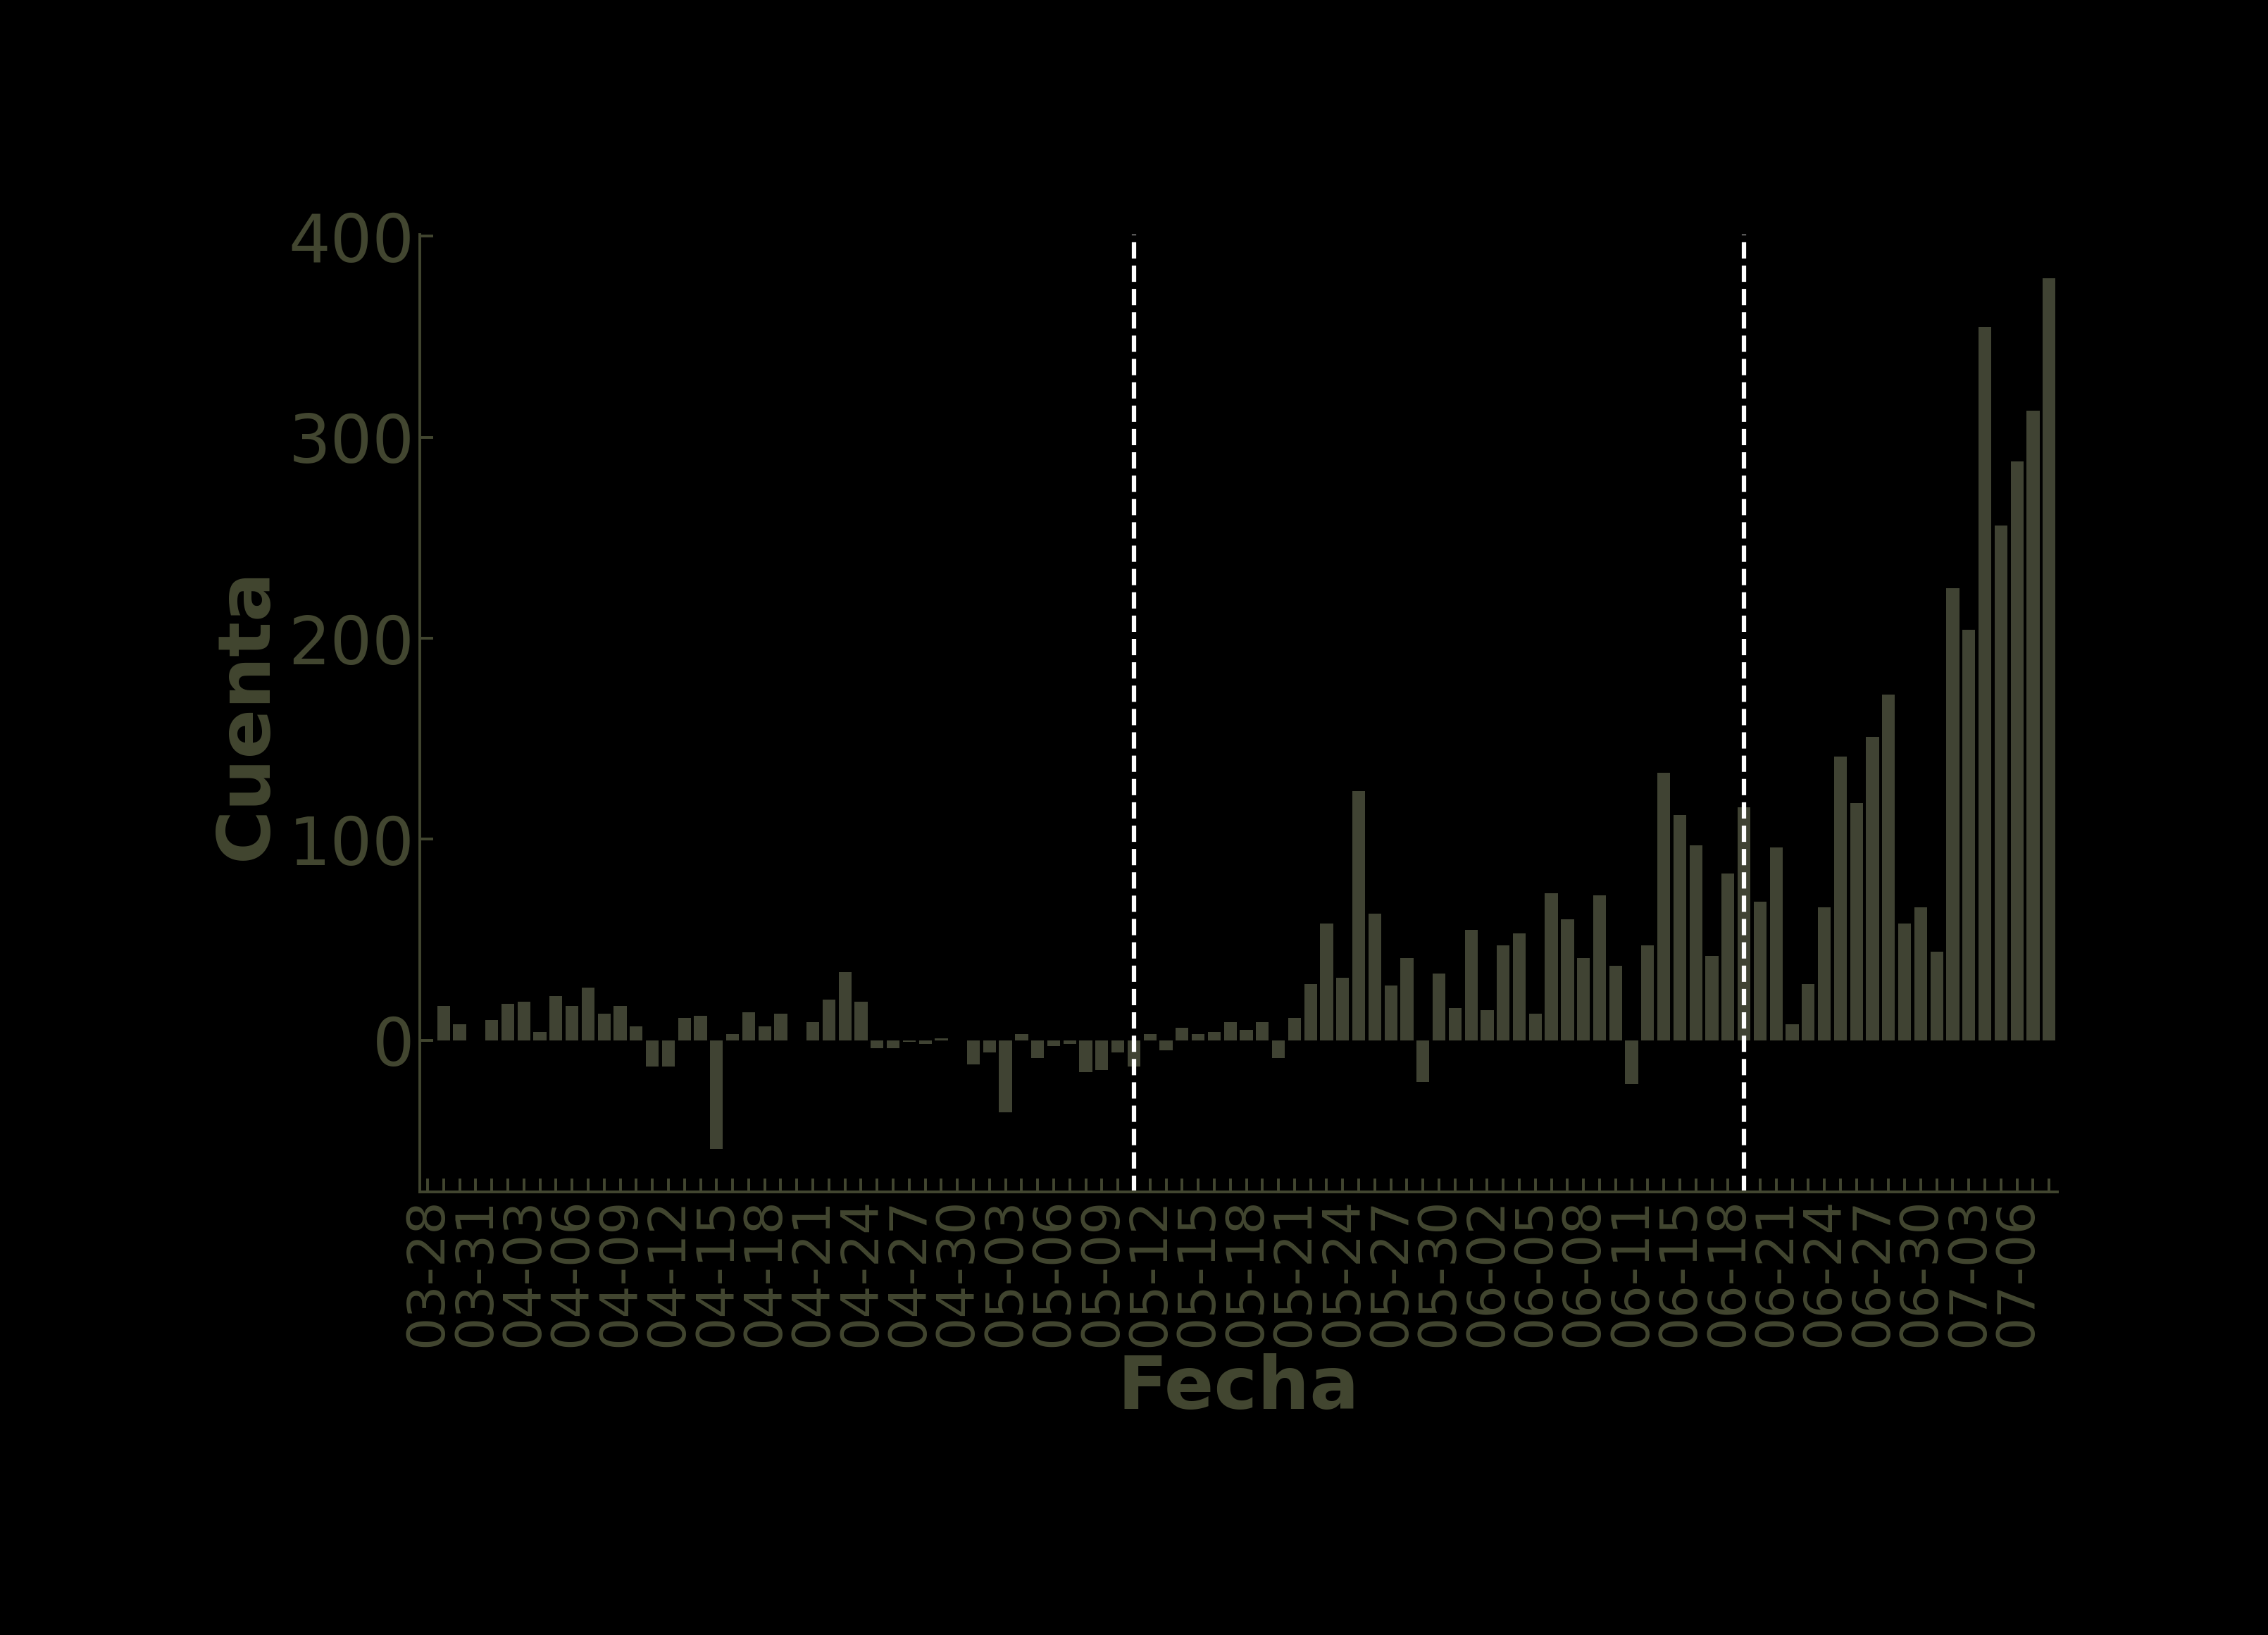

In [20]:
sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha_boletin", y="cambio_activos", data=cuenta, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(cuenta[cuenta["fecha_boletin"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta[cuenta["fecha_boletin"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)


for i,label in enumerate(ax.get_xticklabels()):
    if i%3 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'cambio_activos.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## En hospital por dia

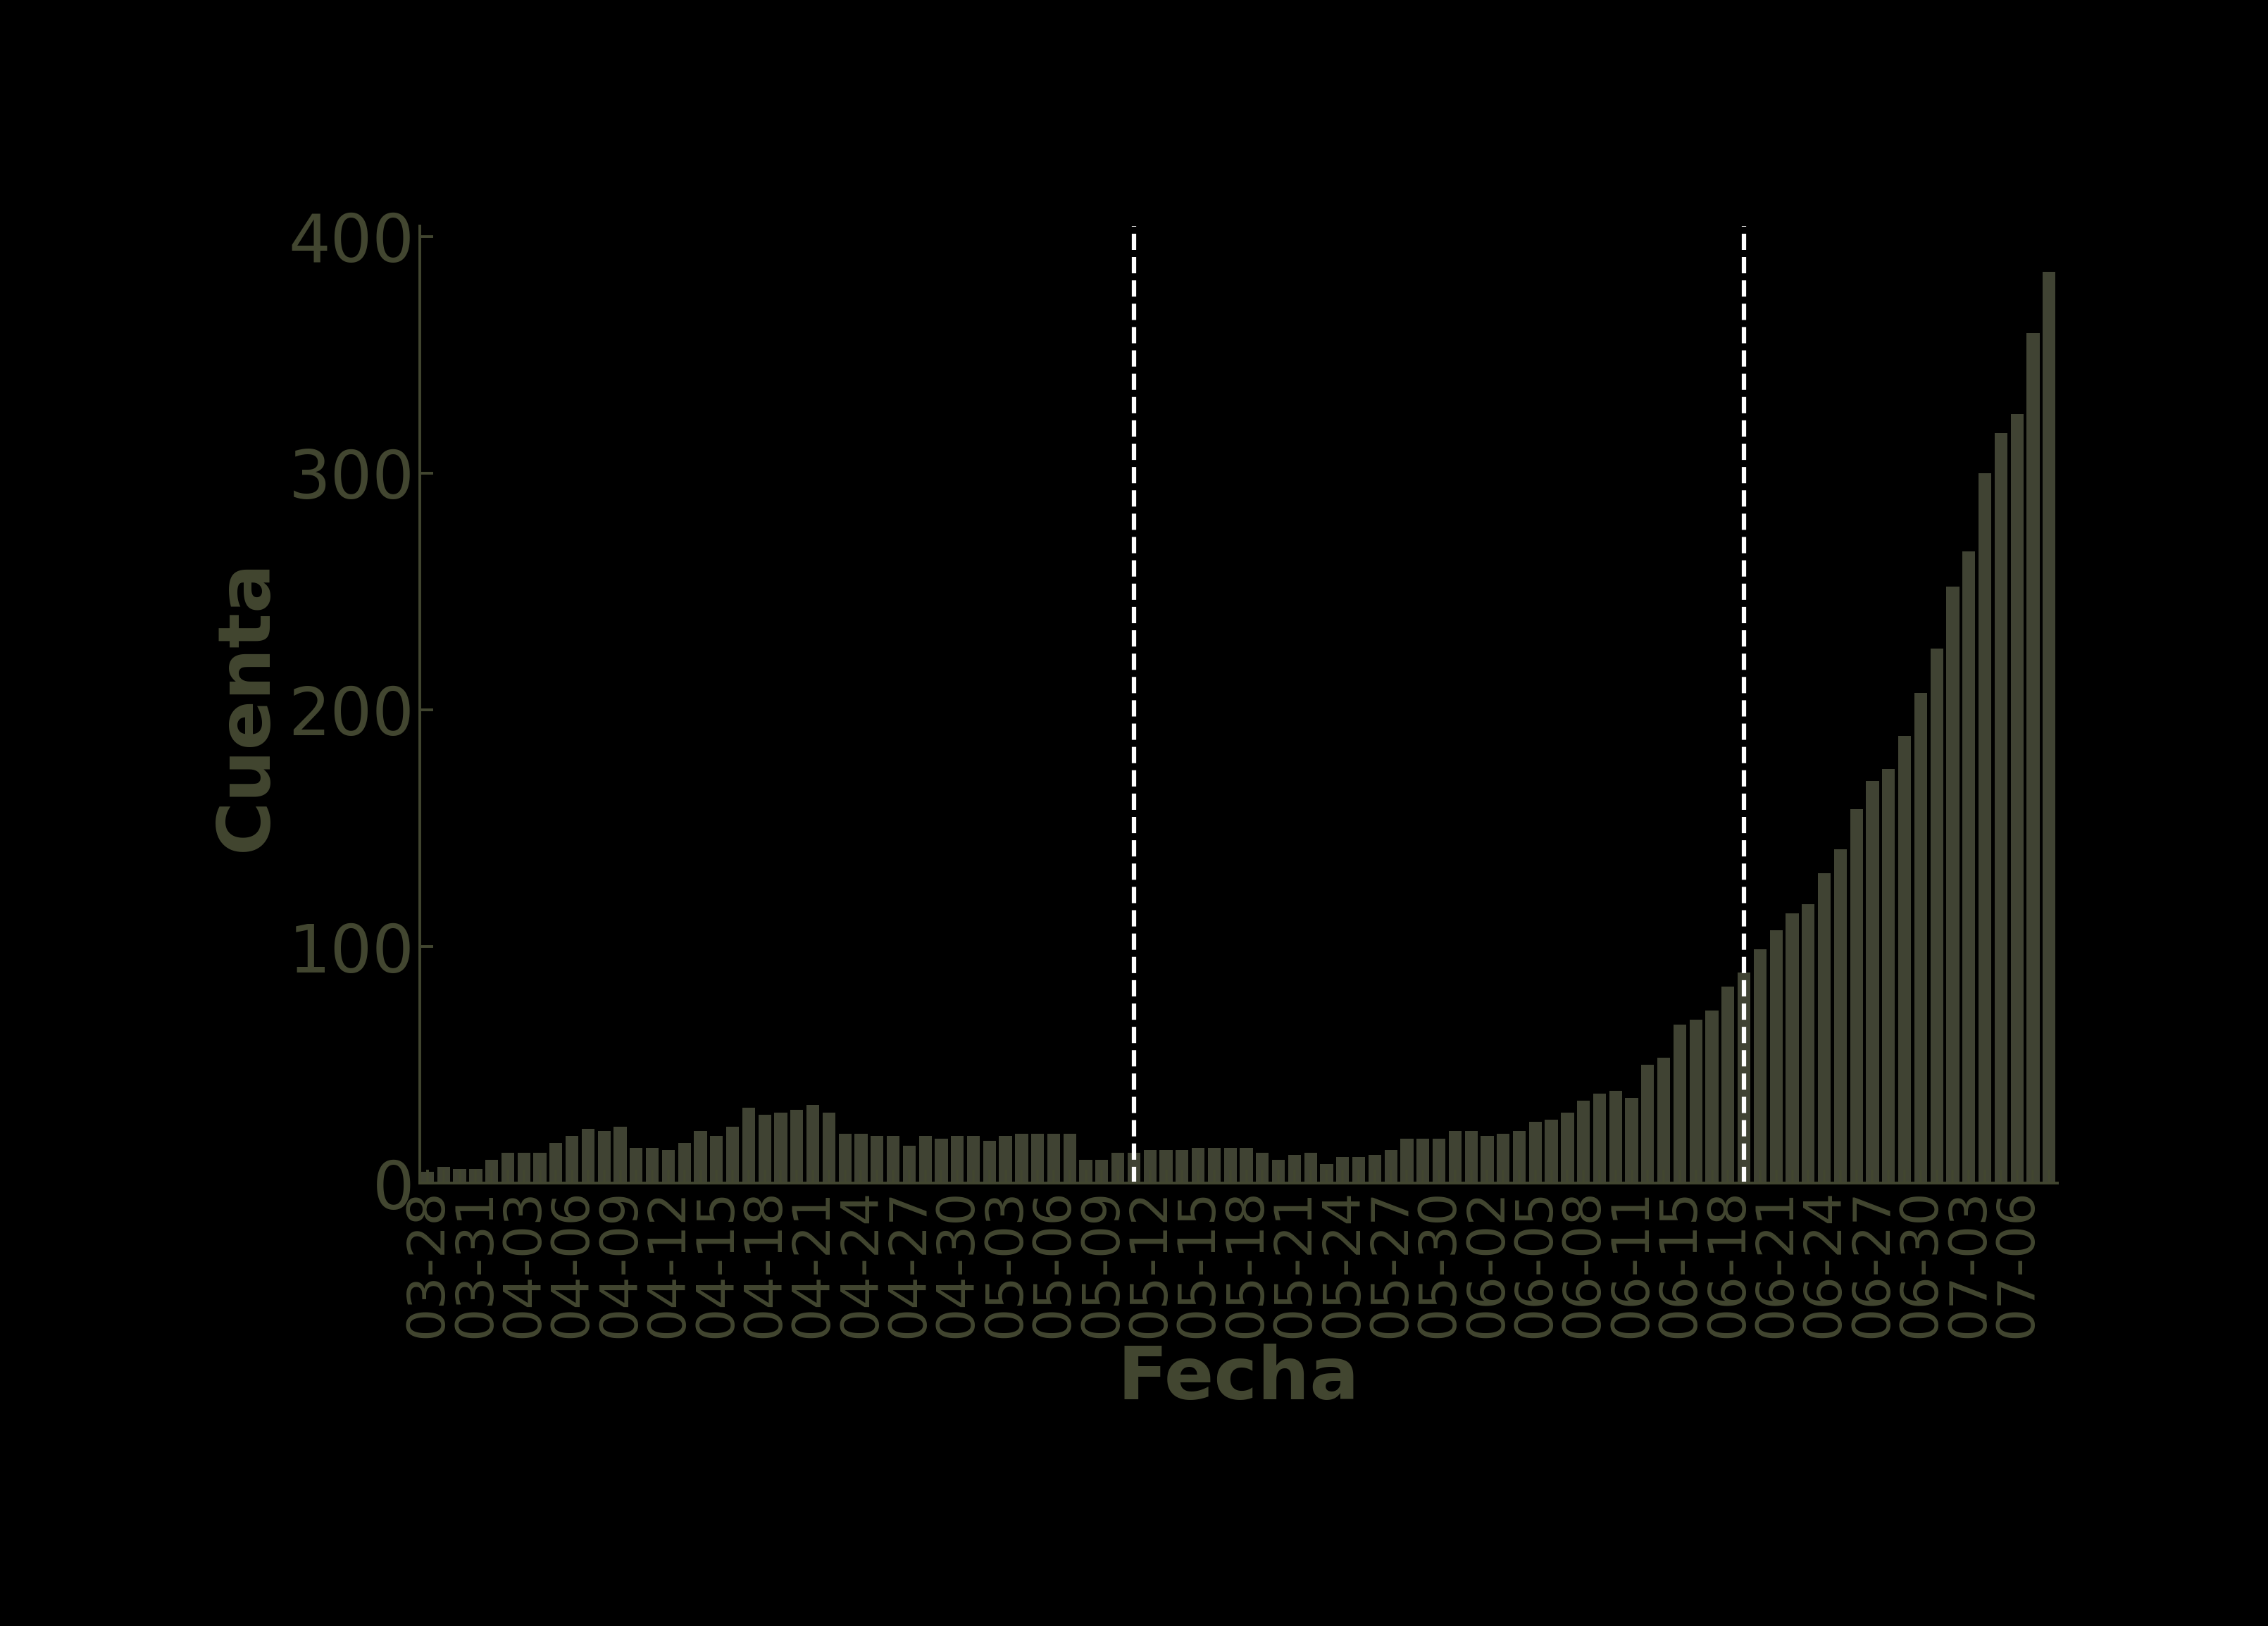

In [21]:
en_hosp = ['hospital UCI', 'hospital','Hospital UCI', 'Hospital','Hospital UCI ']
en_uci = ['hospital UCI','Hospital UCI','Hospital UCI ']

df_hosp = df_boletines[df_boletines["Ubicación"].isin(en_hosp)]
df_uci = df_boletines[df_boletines["Ubicación"].isin(en_uci)]

cuenta = df_hosp.groupby("fecha_boletin").size().to_frame("cuenta").reset_index()
cuenta["fecha_boletin"] = pd.to_datetime(cuenta["fecha_boletin"])
cuenta["fecha_boletin"] = cuenta["fecha_boletin"].dt.strftime('%m-%d')
cuenta["nuevos"] = cuenta["cuenta"].diff()

sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha_boletin", y="cuenta", data=cuenta, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(cuenta[cuenta["fecha_boletin"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta[cuenta["fecha_boletin"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)


for i,label in enumerate(ax.get_xticklabels()):
    if i%3 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'hospitalxdia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Nuevos en hospital por dia

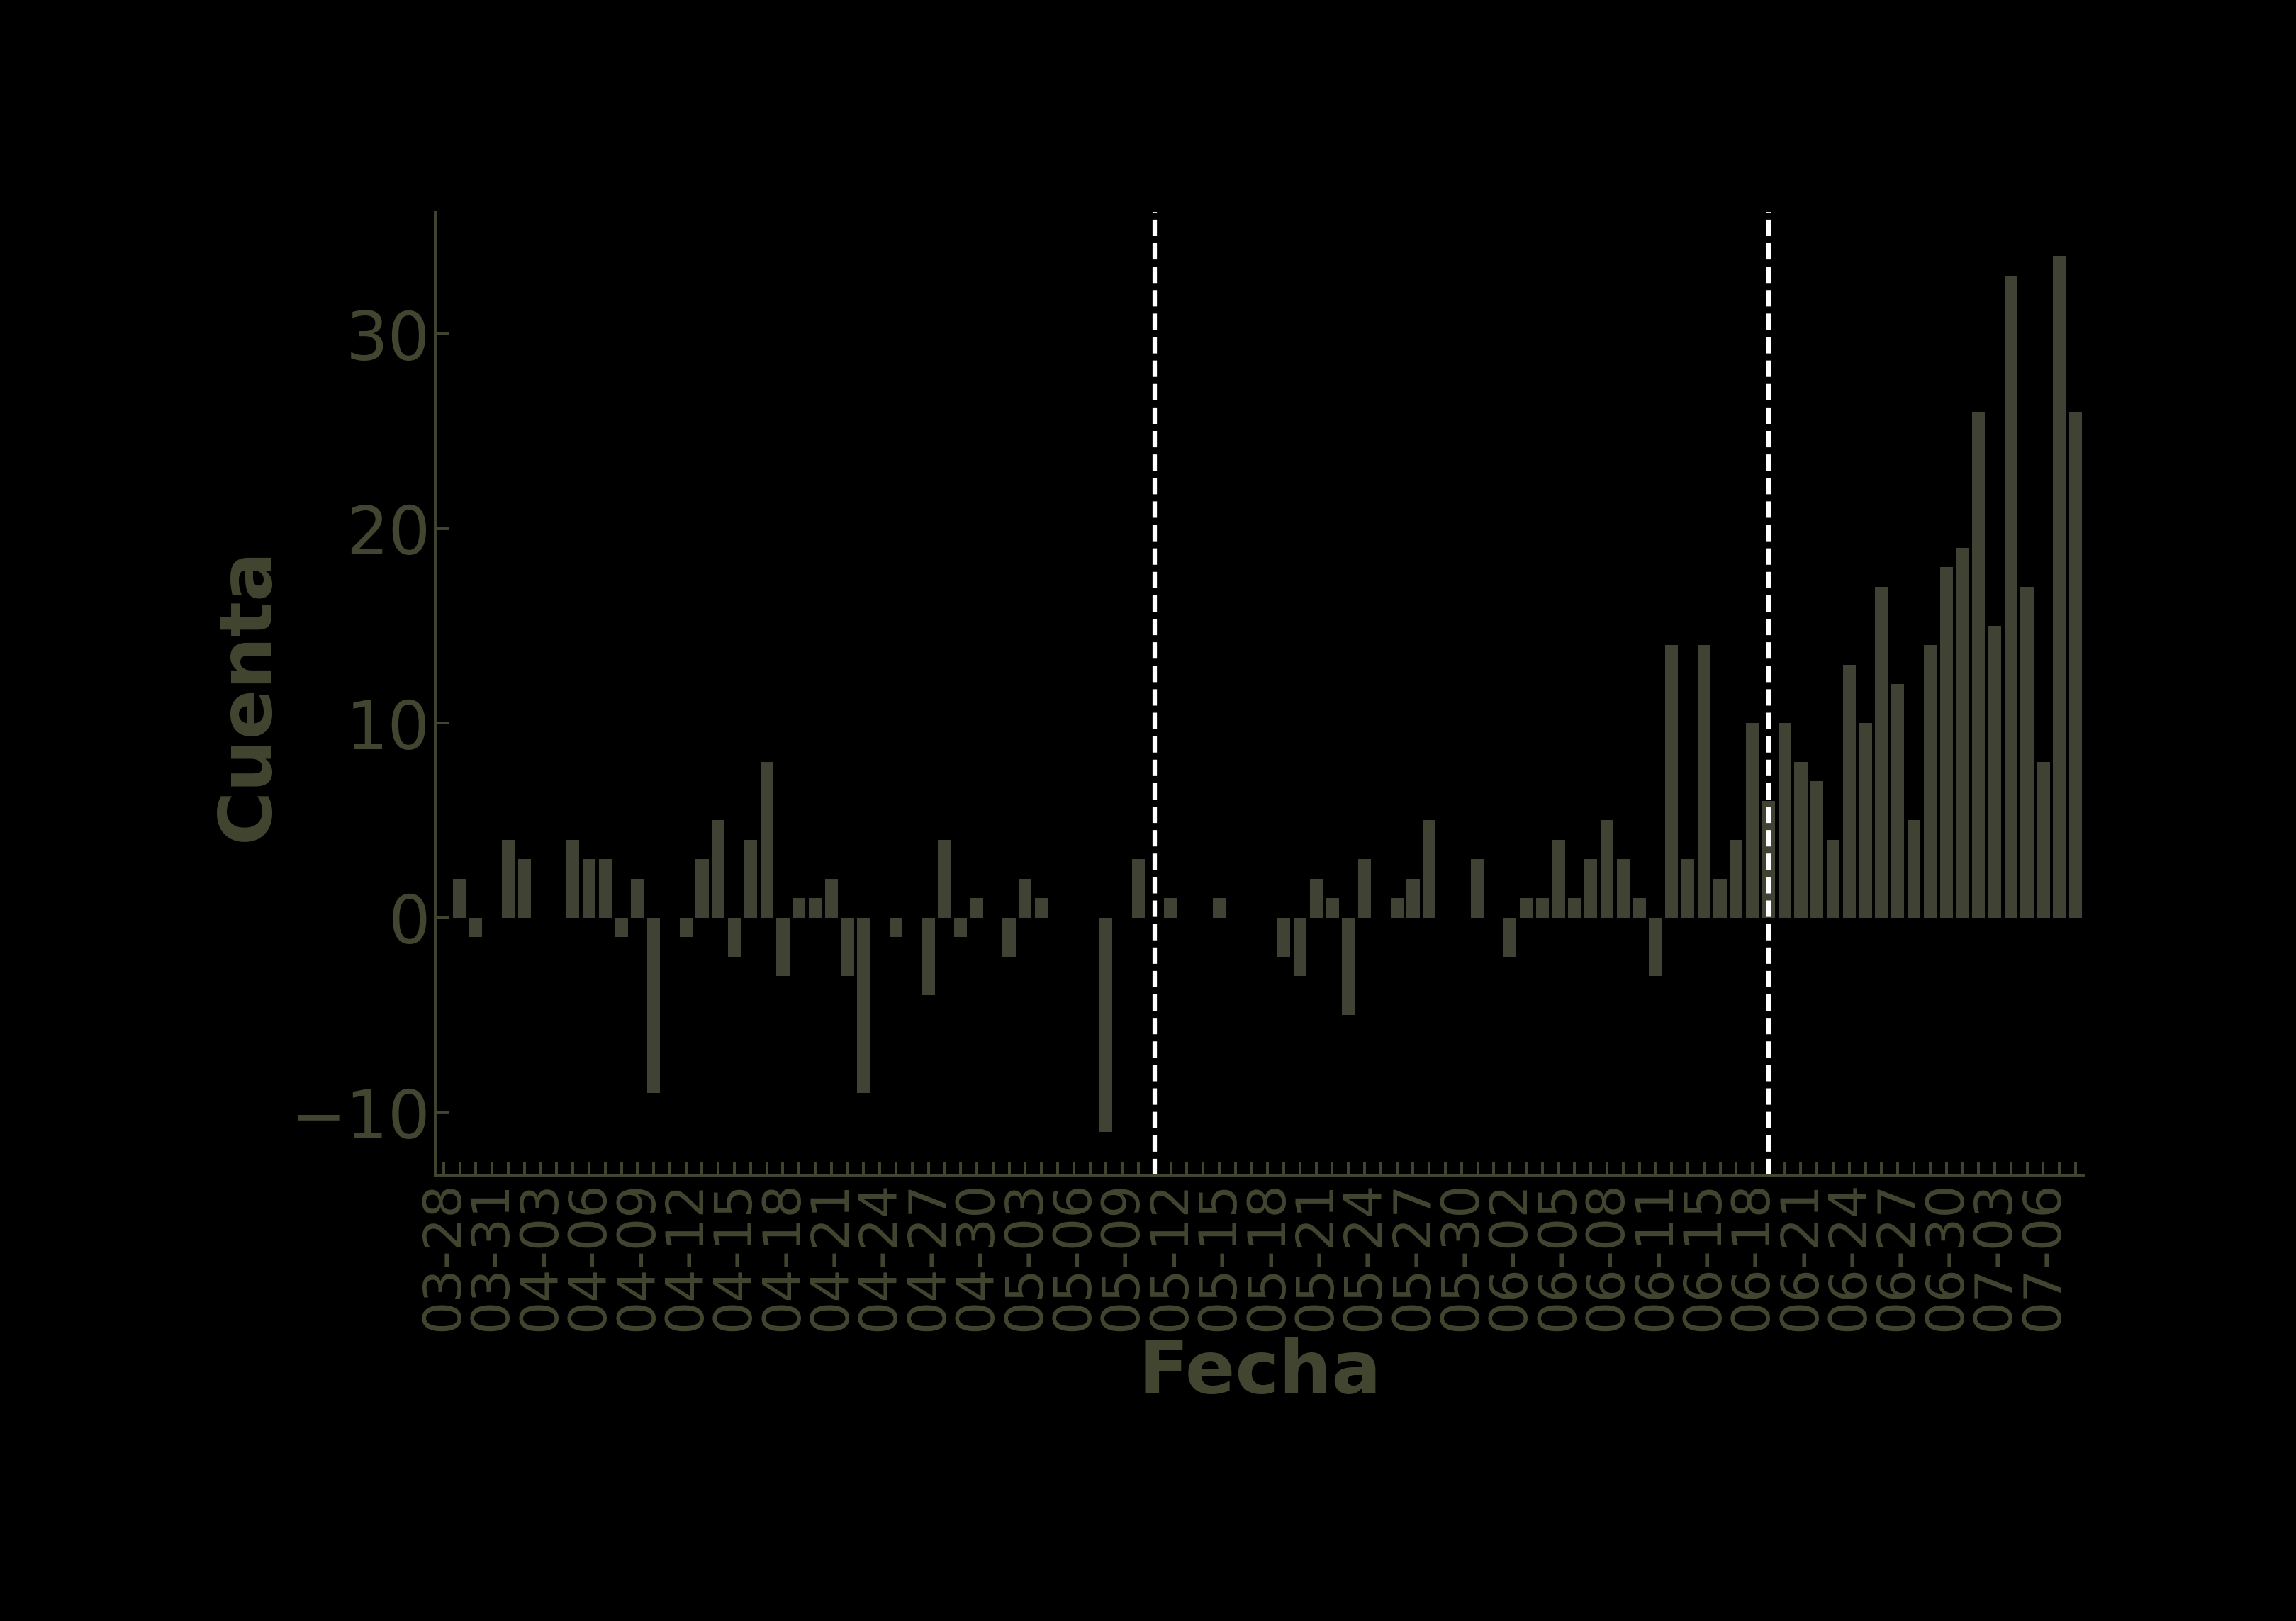

In [22]:
sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha_boletin", y="nuevos", data=cuenta, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(cuenta[cuenta["fecha_boletin"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta[cuenta["fecha_boletin"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)


for i,label in enumerate(ax.get_xticklabels()):
    if i%3 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'hospital_nuevo.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## muertes

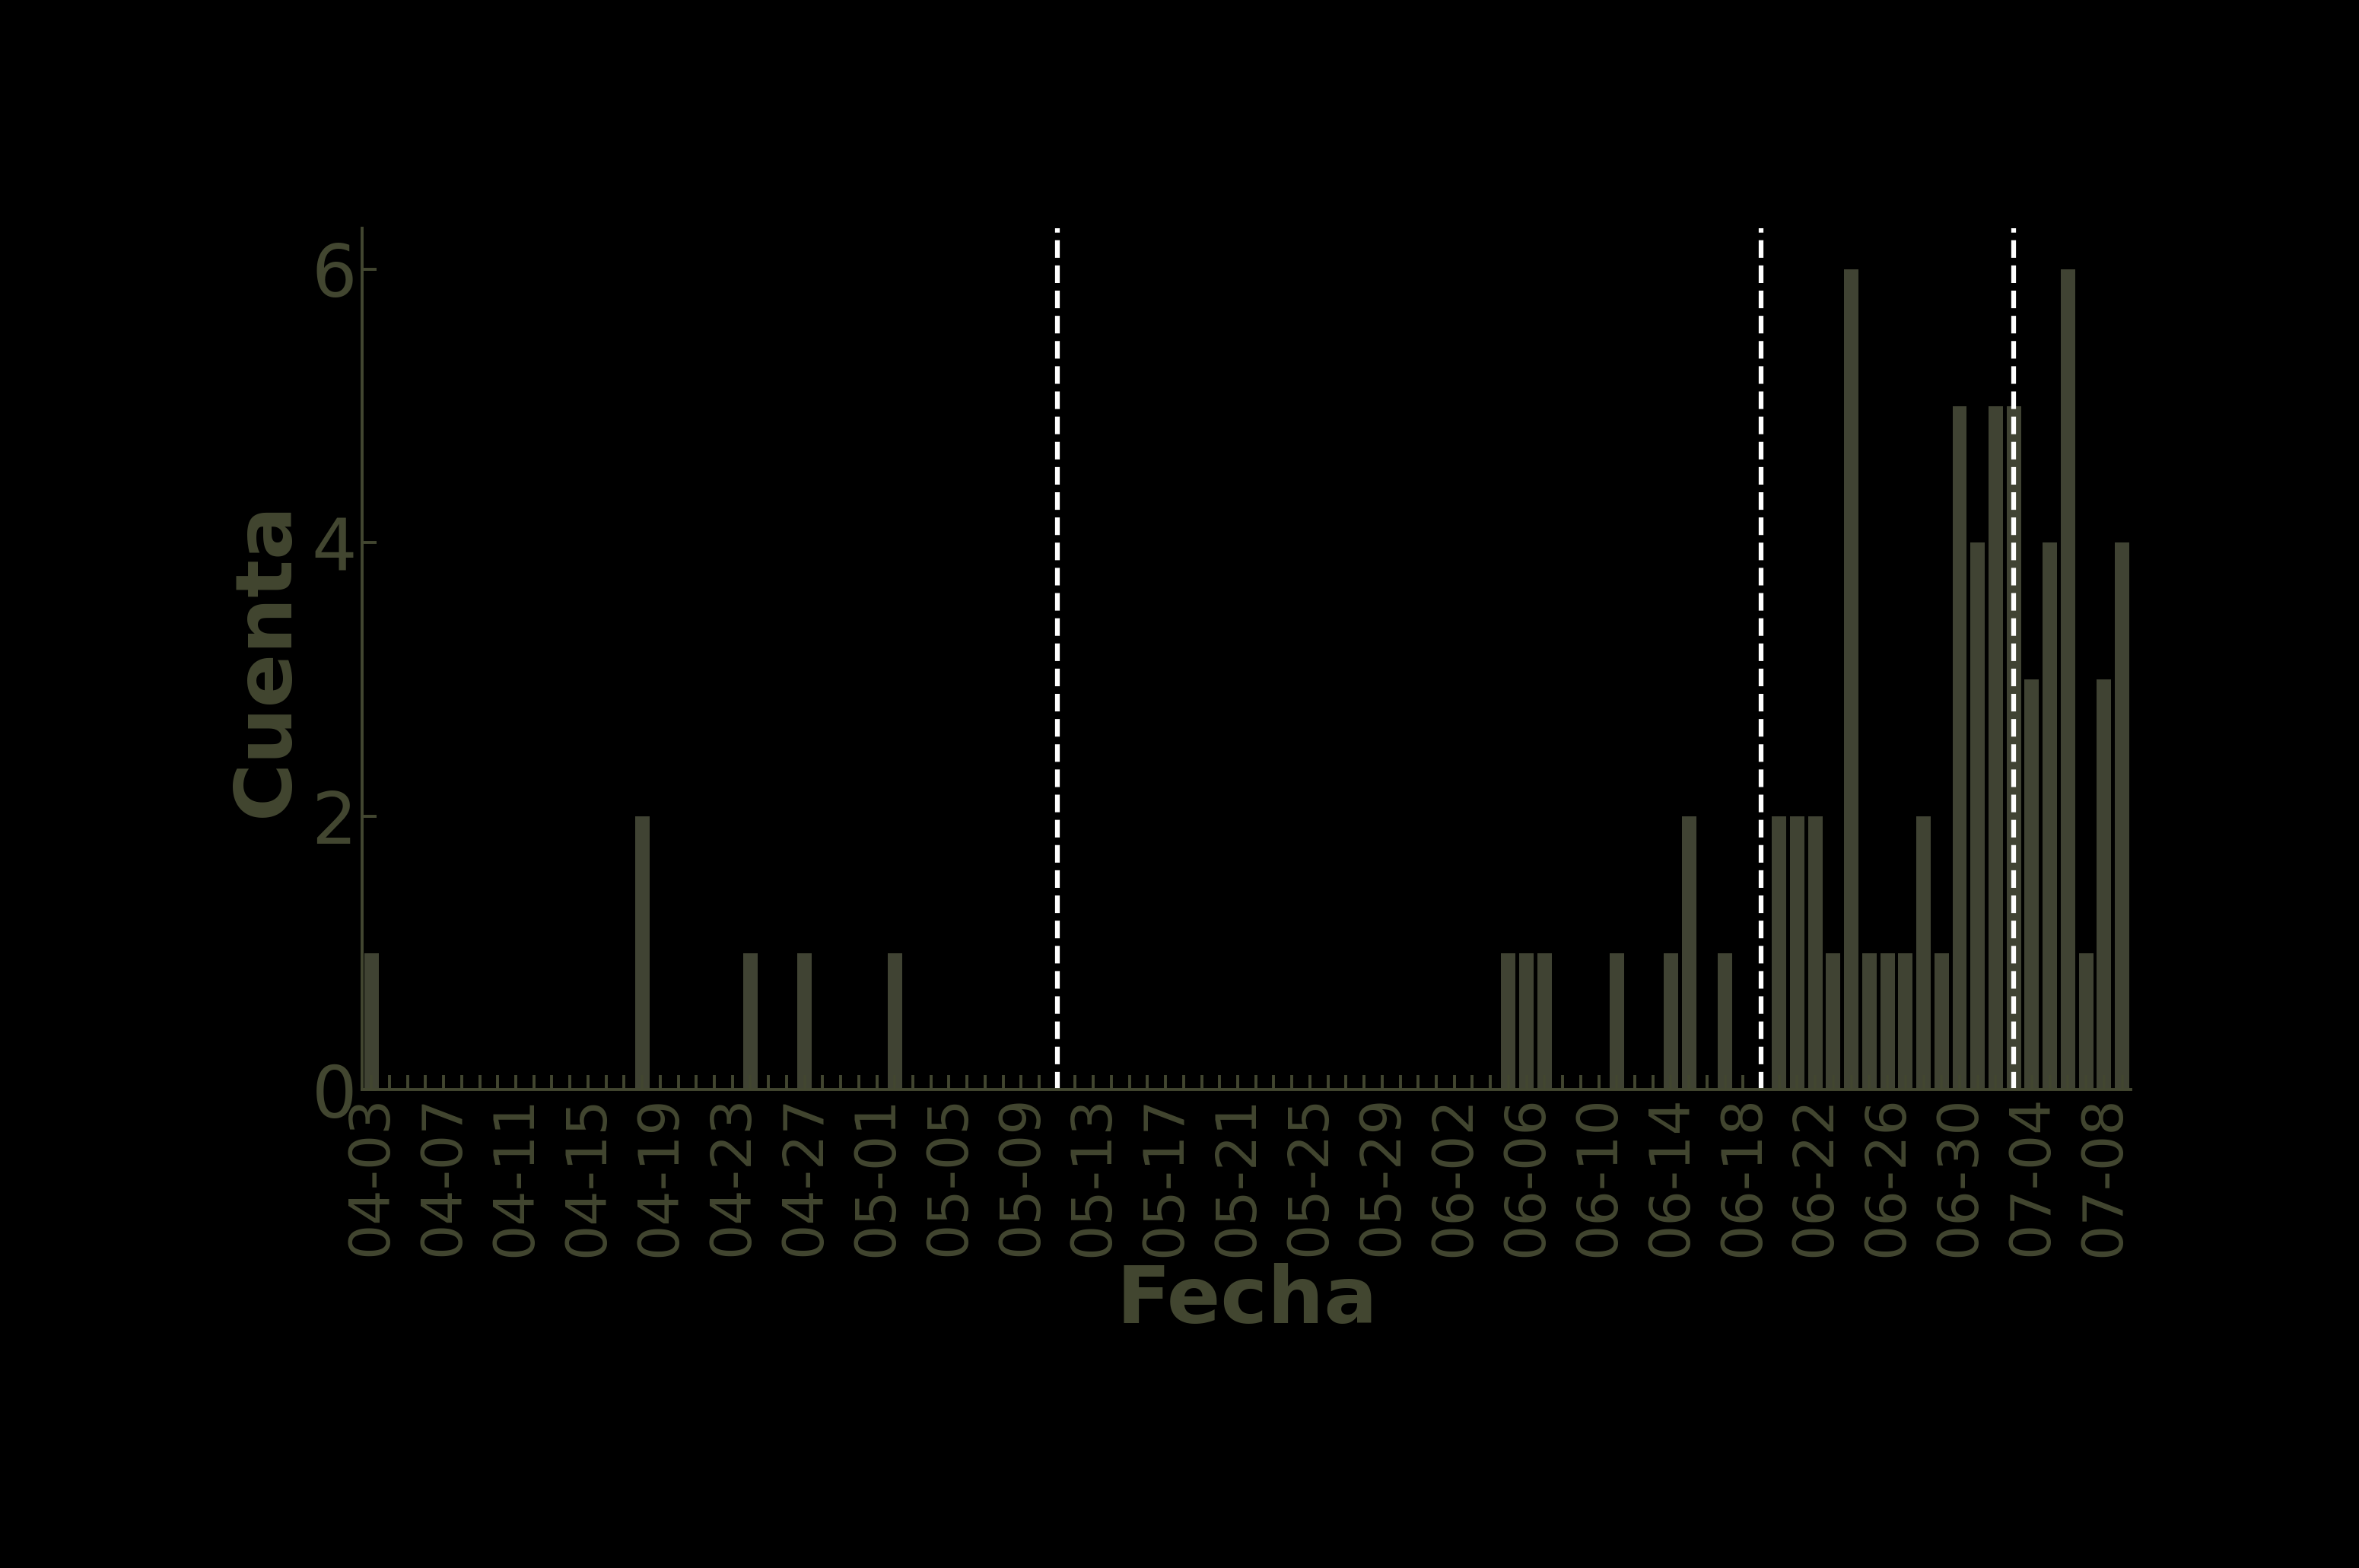

In [23]:
df_ant_changed = df_ant.copy()
df_ant_changed["fecha_de_muerte"] = df_ant_changed["fecha_de_muerte"].dropna()
cuenta_rec = pd.DataFrame(df_ant_changed.groupby("fecha_de_muerte")["id_de_caso"].count()).reset_index()

cuenta_rec = cuenta_rec.rename(columns={"id_de_caso":"cuenta"})

idx = pd.date_range(cuenta_rec["fecha_de_muerte"].min(), cuenta_rec["fecha_de_muerte"].max())
all_dates = pd.DataFrame(idx, columns=["fecha"])
cuenta_rec = all_dates.merge(cuenta_rec, left_on="fecha", 
                right_on="fecha_de_muerte", 
                how="left").drop("fecha_de_muerte", axis=1).fillna(0)
cuenta_rec["fecha"] = cuenta_rec["fecha"].dt.strftime('%m-%d')

sns.set_context("talk")
cuenta_plot = cuenta_rec.reset_index(drop=True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x="fecha", y="cuenta", data=cuenta_plot, color=color)

plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "06-19"].index[0], color="white", linestyle='--', linewidth=3)
plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "07-03"].index[0], color="white", linestyle='--', linewidth=3)

plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)
plt.setp(ax.spines.values(), color=color)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
for i,label in enumerate(ax.get_xticklabels()):
    if i%4 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'muertes_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Recuperados

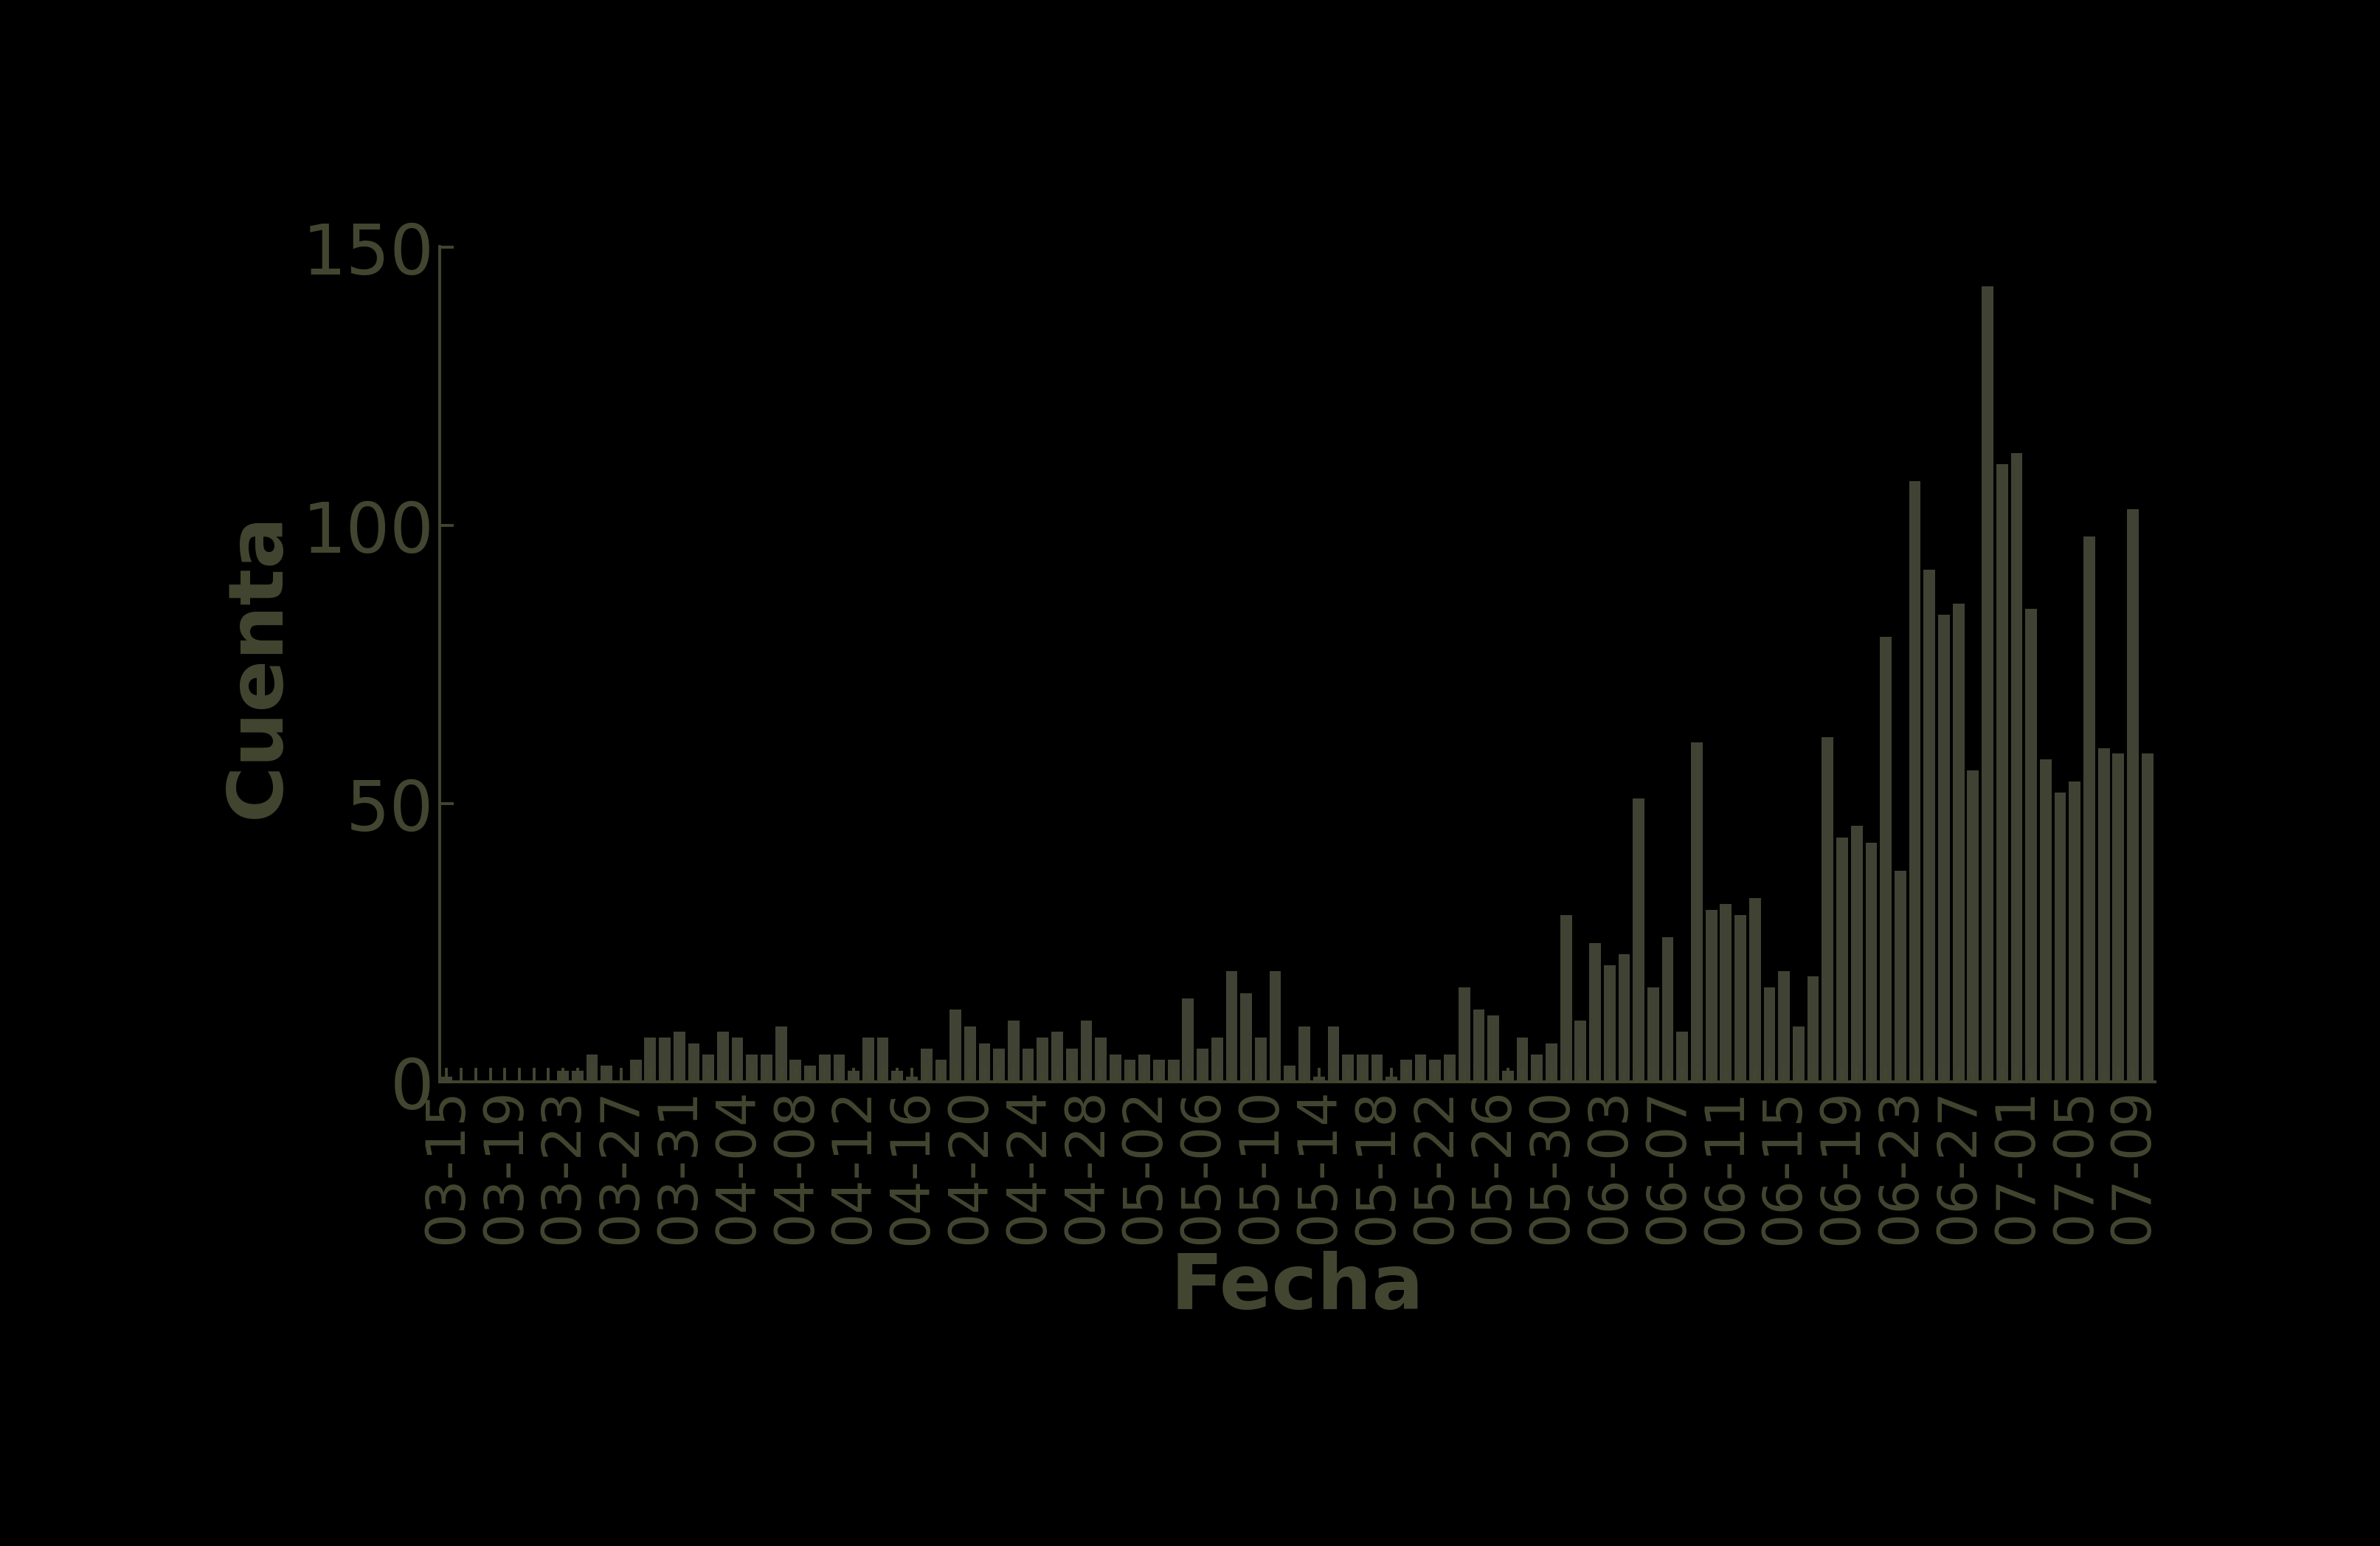

In [24]:
df_ant_changed = df_ant.copy()
df_ant_changed["fecha_recuperado"] = df_ant_changed["fecha_recuperado"].dropna()
cuenta_rec = pd.DataFrame(df_ant_changed.groupby("fecha_recuperado")["id_de_caso"].count()).reset_index()

cuenta_rec = cuenta_rec.rename(columns={"id_de_caso":"cuenta"})

idx = pd.date_range(cuenta_rec["fecha_recuperado"].min(), cuenta_rec["fecha_recuperado"].max())
all_dates = pd.DataFrame(idx, columns=["fecha"])
cuenta_rec = all_dates.merge(cuenta_rec, left_on="fecha", 
                right_on="fecha_recuperado", 
                how="left").drop("fecha_recuperado", axis=1).fillna(0)
cuenta_rec["fecha"] = cuenta_rec["fecha"].dt.strftime('%m-%d')

sns.set_context("talk")
cuenta_plot = cuenta_rec.reset_index(drop=True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x="fecha", y="cuenta", data=cuenta_plot, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)
plt.setp(ax.spines.values(), color=color)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
for i,label in enumerate(ax.get_xticklabels()):
    if i%4 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'recuperados_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Piramide de contagio, personas en UCI y fallecidos

In [25]:
casos_hosp = df_hosp["Caso"].dropna().astype(int).astype(str).values
casos_uci = df_uci["Caso"].dropna().astype(int).astype(str).values
hosp_df_ant = df_ant[df_ant["id_de_caso"].isin(casos_hosp)]
uci_df_ant = df_ant[df_ant["id_de_caso"].isin(casos_uci)]


df_male = df_ant[df_ant["sexo"] == "M"]
df_female = df_ant[df_ant["sexo"] == "F"]

male_hosp = hosp_df_ant[hosp_df_ant["sexo"] == "M"]
female_hosp = hosp_df_ant[hosp_df_ant["sexo"] == "F"]

male_uci = uci_df_ant[uci_df_ant["sexo"] == "M"]
female_uci = uci_df_ant[uci_df_ant["sexo"] == "F"]

male_death = df_male[df_male["estado"]=="FALLECIDO"]
female_death = df_female[df_female["estado"]=="FALLECIDO"]



m_cont = df_male.groupby(pd.cut(df_male["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Hombres")
f_cont = df_female.groupby(pd.cut(df_female["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Mujeres")

m_hosp_cont = male_hosp.groupby(pd.cut(male_hosp["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Hombres en hospital")
f_hosp_cont = female_hosp.groupby(pd.cut(female_hosp["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Mujeres en hospital")

m_uci_cont = male_uci.groupby(pd.cut(male_uci["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Hombres en UCI")
f_uci_cont = female_uci.groupby(pd.cut(female_uci["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Mujeres en UCI")

m_d_cont = male_death.groupby(pd.cut(male_death["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Hombres fallecidos")
f_d_cont = female_death.groupby(pd.cut(female_death["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Mujeres fallecidas")

piramide = m_cont.join(f_cont).join(m_d_cont).join(f_d_cont).join(m_uci_cont).join(f_uci_cont).join(m_hosp_cont).join(f_hosp_cont).reset_index()

piramide["Hombres"] = -piramide["Hombres"]
piramide["Hombres en hospital"] = -piramide["Hombres en hospital"]
piramide["Hombres en UCI"] = -piramide["Hombres en UCI"]
piramide["Hombres fallecidos"] = -piramide["Hombres fallecidos"]

piramide.tail()

,edad,Hombres,Mujeres,Hombres fallecidos,Mujeres fallecidas,Hombres en UCI,Mujeres en UCI,Hombres en hospital,Mujeres en hospital
19,"(76, 80]",-43,29,-5,0,-4,0,-15,7
20,"(80, 84]",-27,28,-2,6,-2,0,-11,10
21,"(84, 88]",-22,19,-4,6,-4,1,-14,6
22,"(88, 92]",-13,12,-4,5,-1,0,-4,6
23,"(92, 96]",-4,4,-1,1,0,0,-3,1


## Contagios - hospital

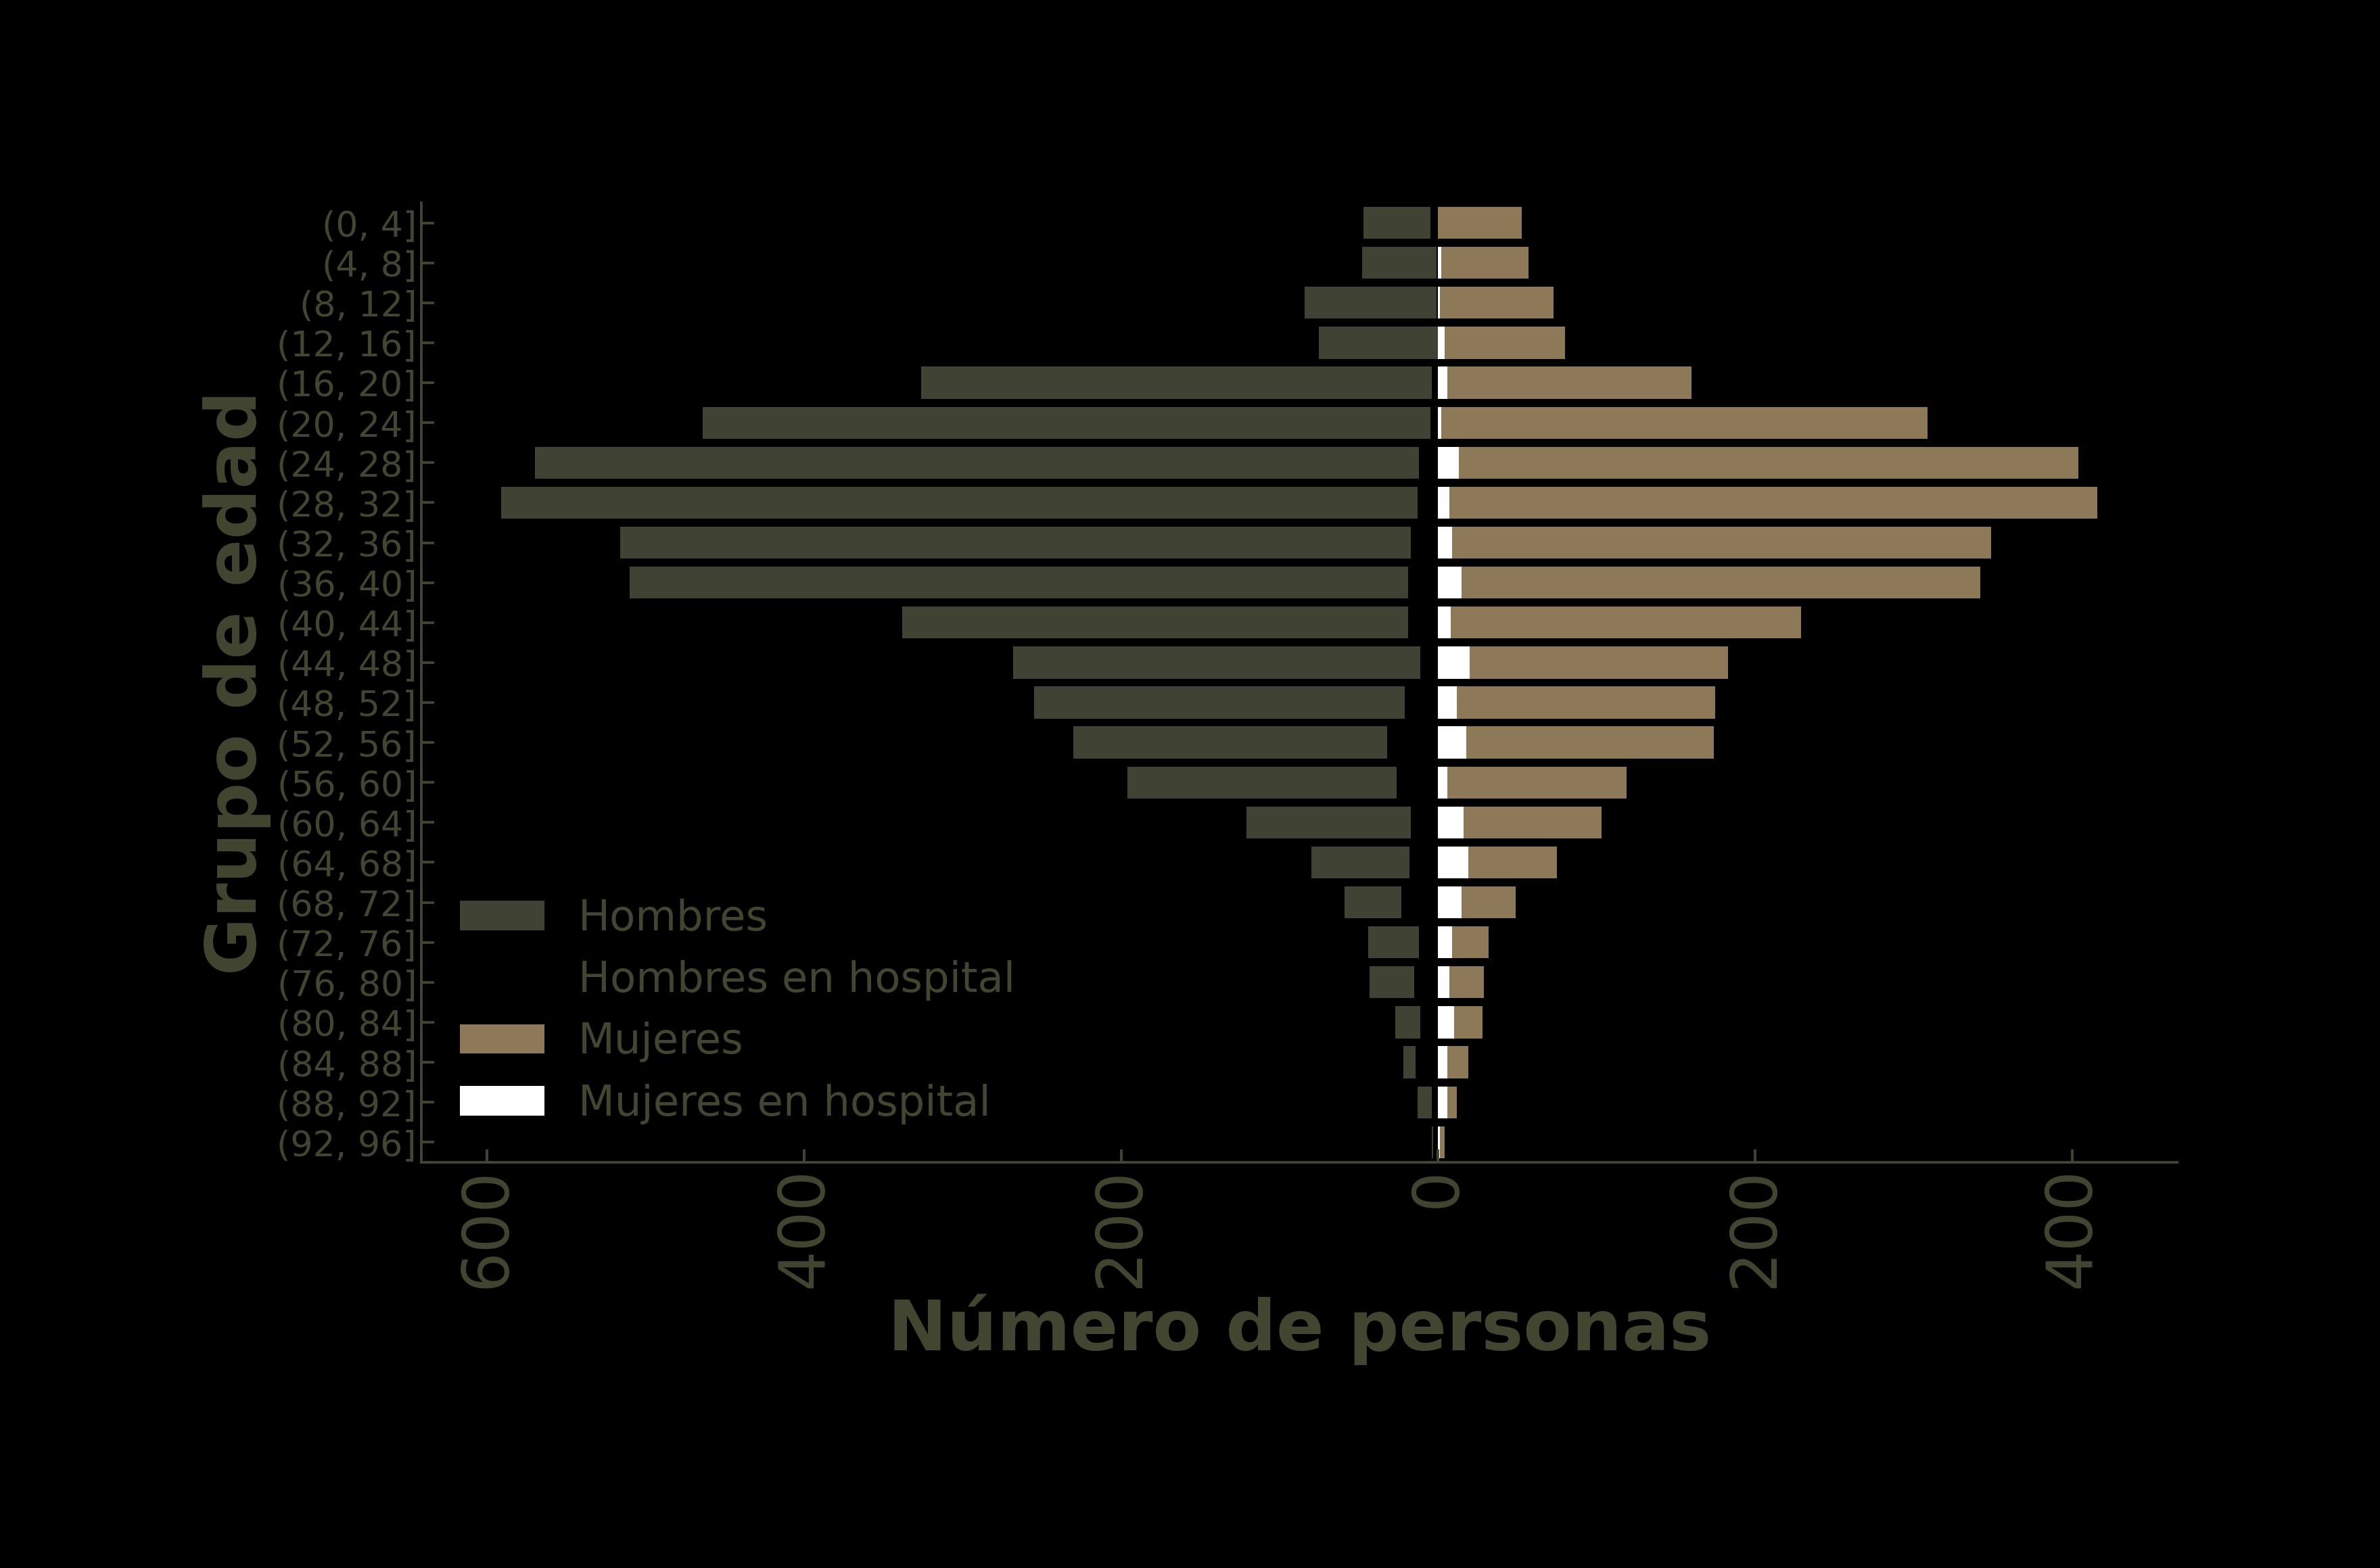

In [26]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x="Hombres",y="edad", color=color, label="Hombres",data = piramide)
ax = sns.barplot(x="Hombres en hospital",y="edad", color="black", label="Hombres en hospital",data = piramide)

ax = sns.barplot(x="Mujeres",y="edad", color="#967B4F", label="Mujeres",data = piramide)
ax = sns.barplot(x="Mujeres en hospital",y="edad", color="white", label="Mujeres en hospital",data = piramide)

plt.setp(ax.spines.values(), color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Número de personas", fontsize=50, color=color)
ax.set_ylabel("Grupo de edad", fontsize=50, color=color)


plt.xticks(fontsize=45)
plt.yticks(fontsize=25)

ax.set_xticklabels(np.abs(list(ax.get_xticks())).astype(int))
plt.legend(framealpha=0.0, fontsize=30)

plt.tight_layout()
plt.savefig(f'piramide_contagios_hosp.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()

## Hospital - UCI

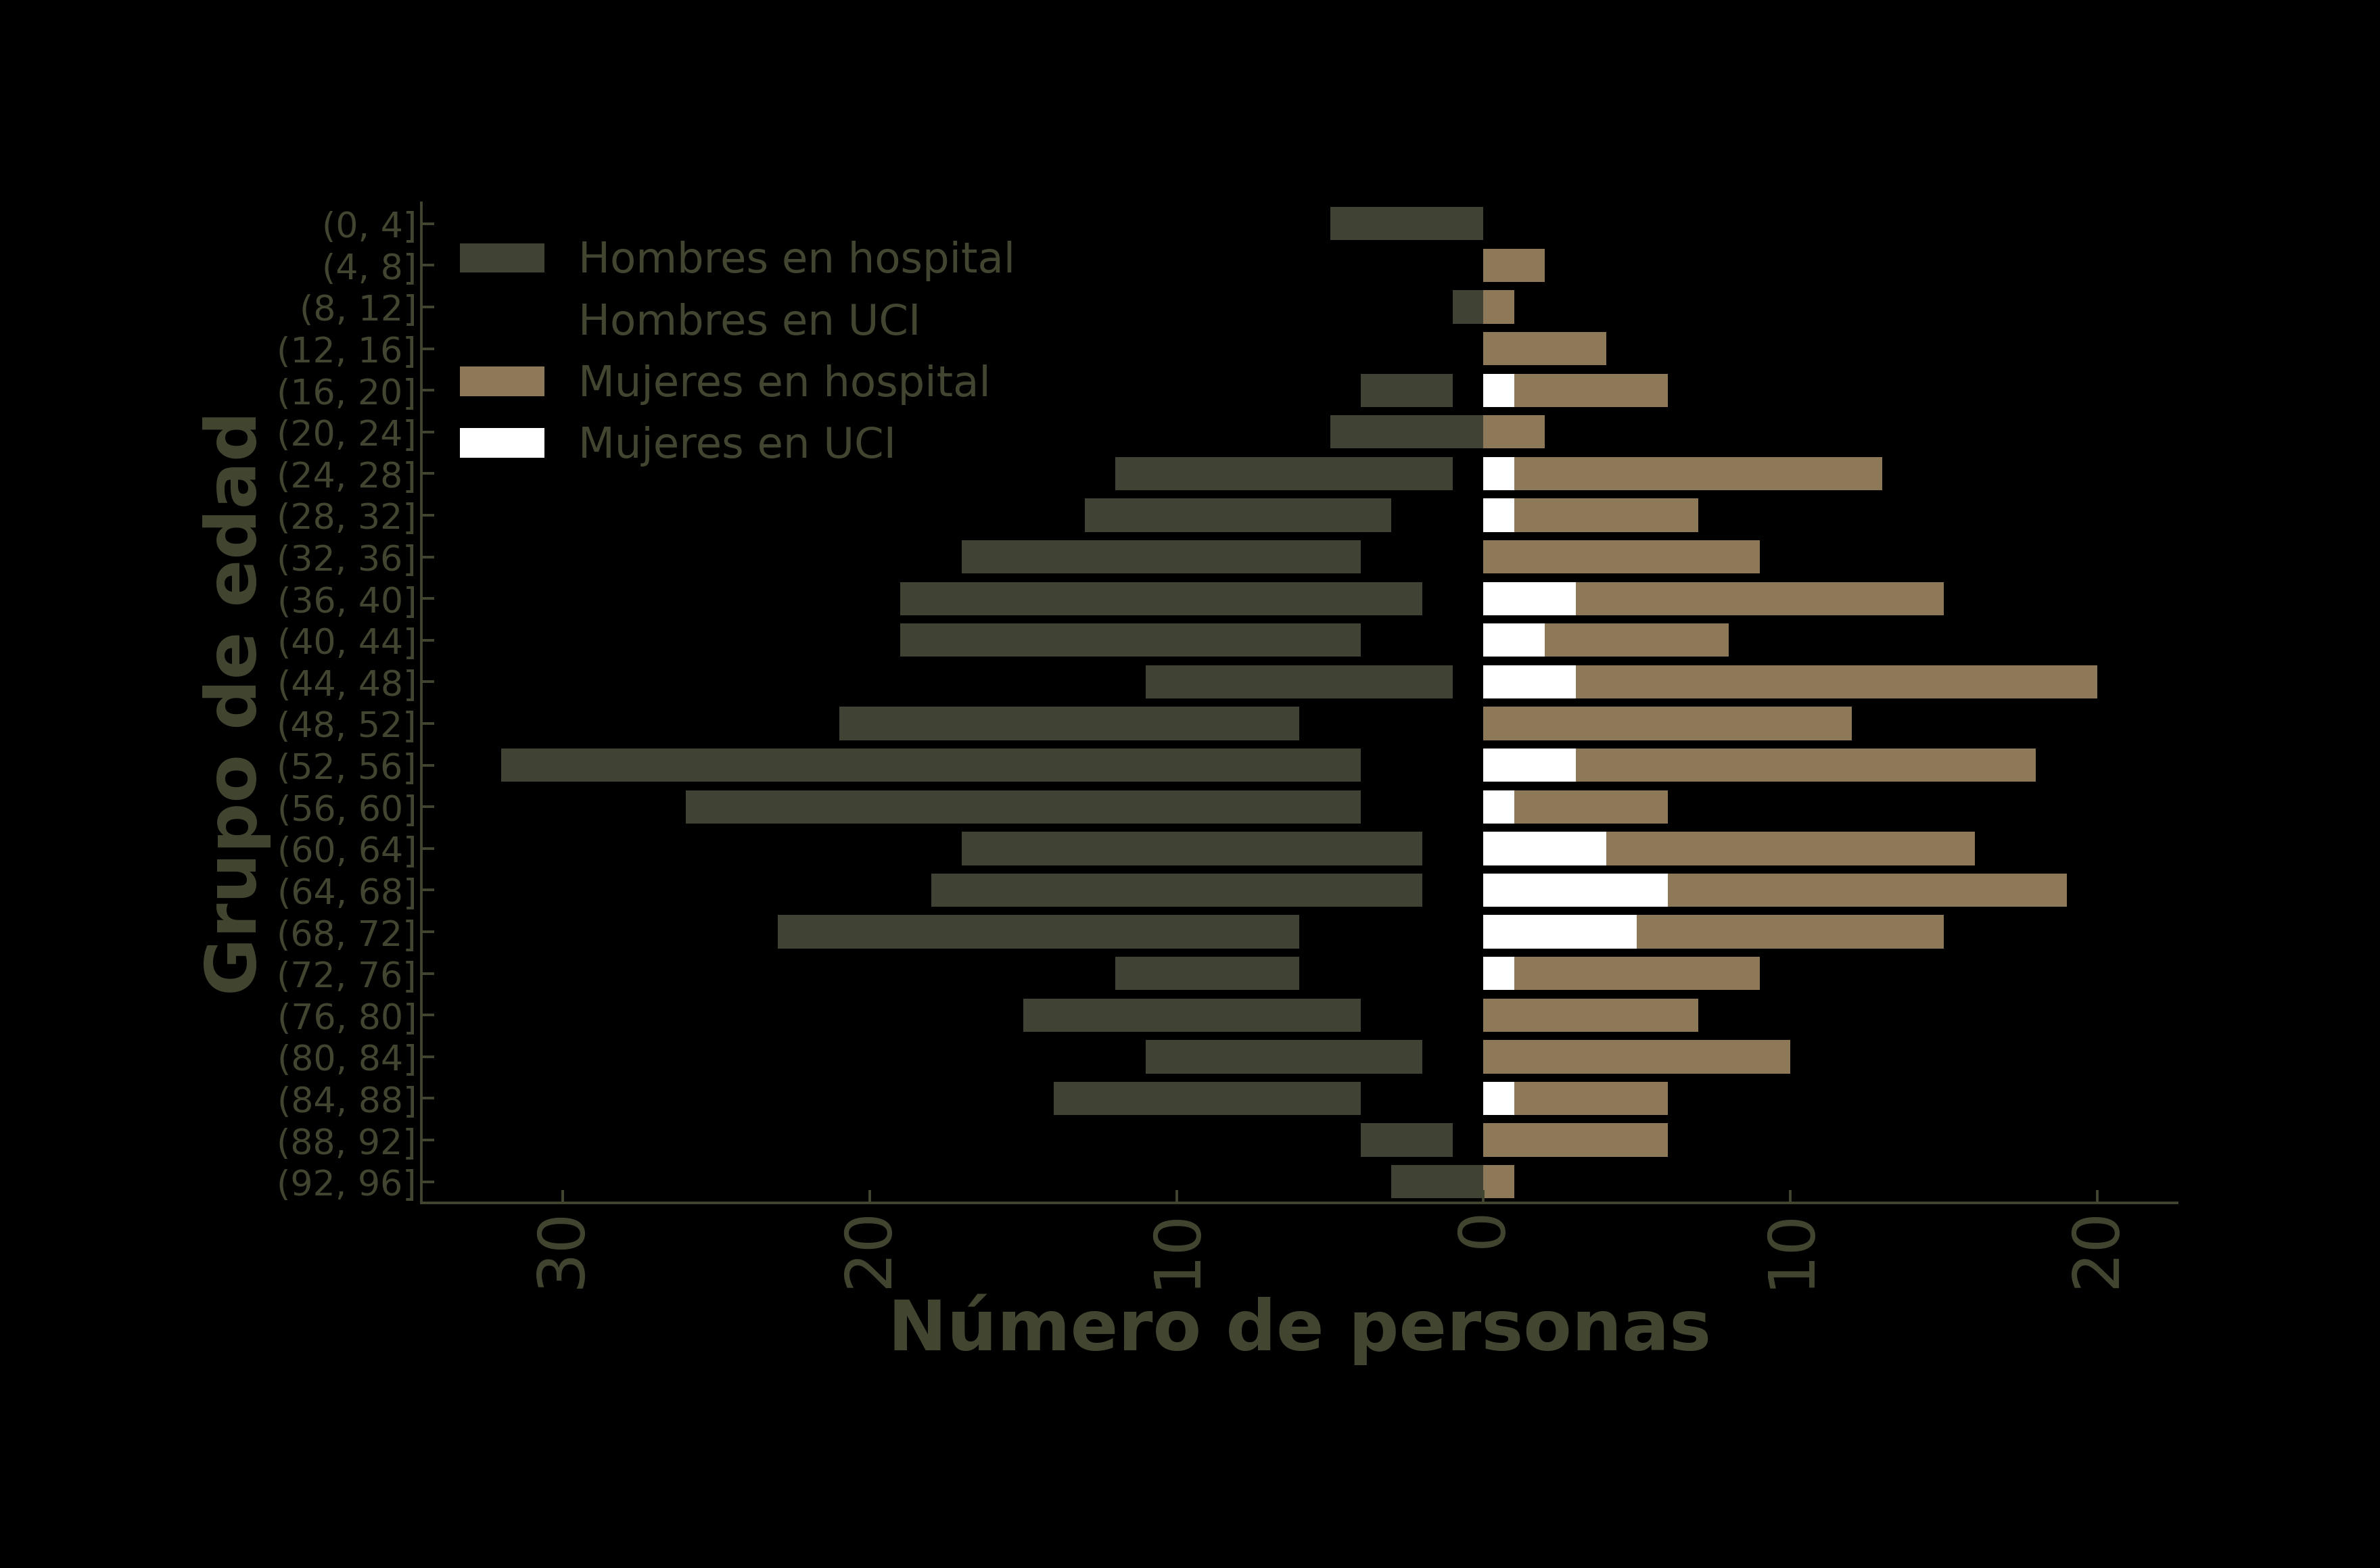

In [27]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x="Hombres en hospital",y="edad", color=color, label="Hombres en hospital",data = piramide)
ax = sns.barplot(x="Hombres en UCI",y="edad", color="black", label="Hombres en UCI",data = piramide)

ax = sns.barplot(x="Mujeres en hospital",y="edad", color="#967B4F", label="Mujeres en hospital",data = piramide)
ax = sns.barplot(x="Mujeres en UCI",y="edad", color="white", label="Mujeres en UCI",data = piramide)

plt.setp(ax.spines.values(), color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Número de personas", fontsize=50, color=color)
ax.set_ylabel("Grupo de edad", fontsize=50, color=color)


plt.xticks(fontsize=45)
plt.yticks(fontsize=25)

ax.set_xticklabels(np.abs(list(ax.get_xticks())).astype(int))
plt.legend(framealpha=0.0, fontsize=30)

plt.tight_layout()
plt.savefig(f'piramide_hosp_uci.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()

## UCI - muertes

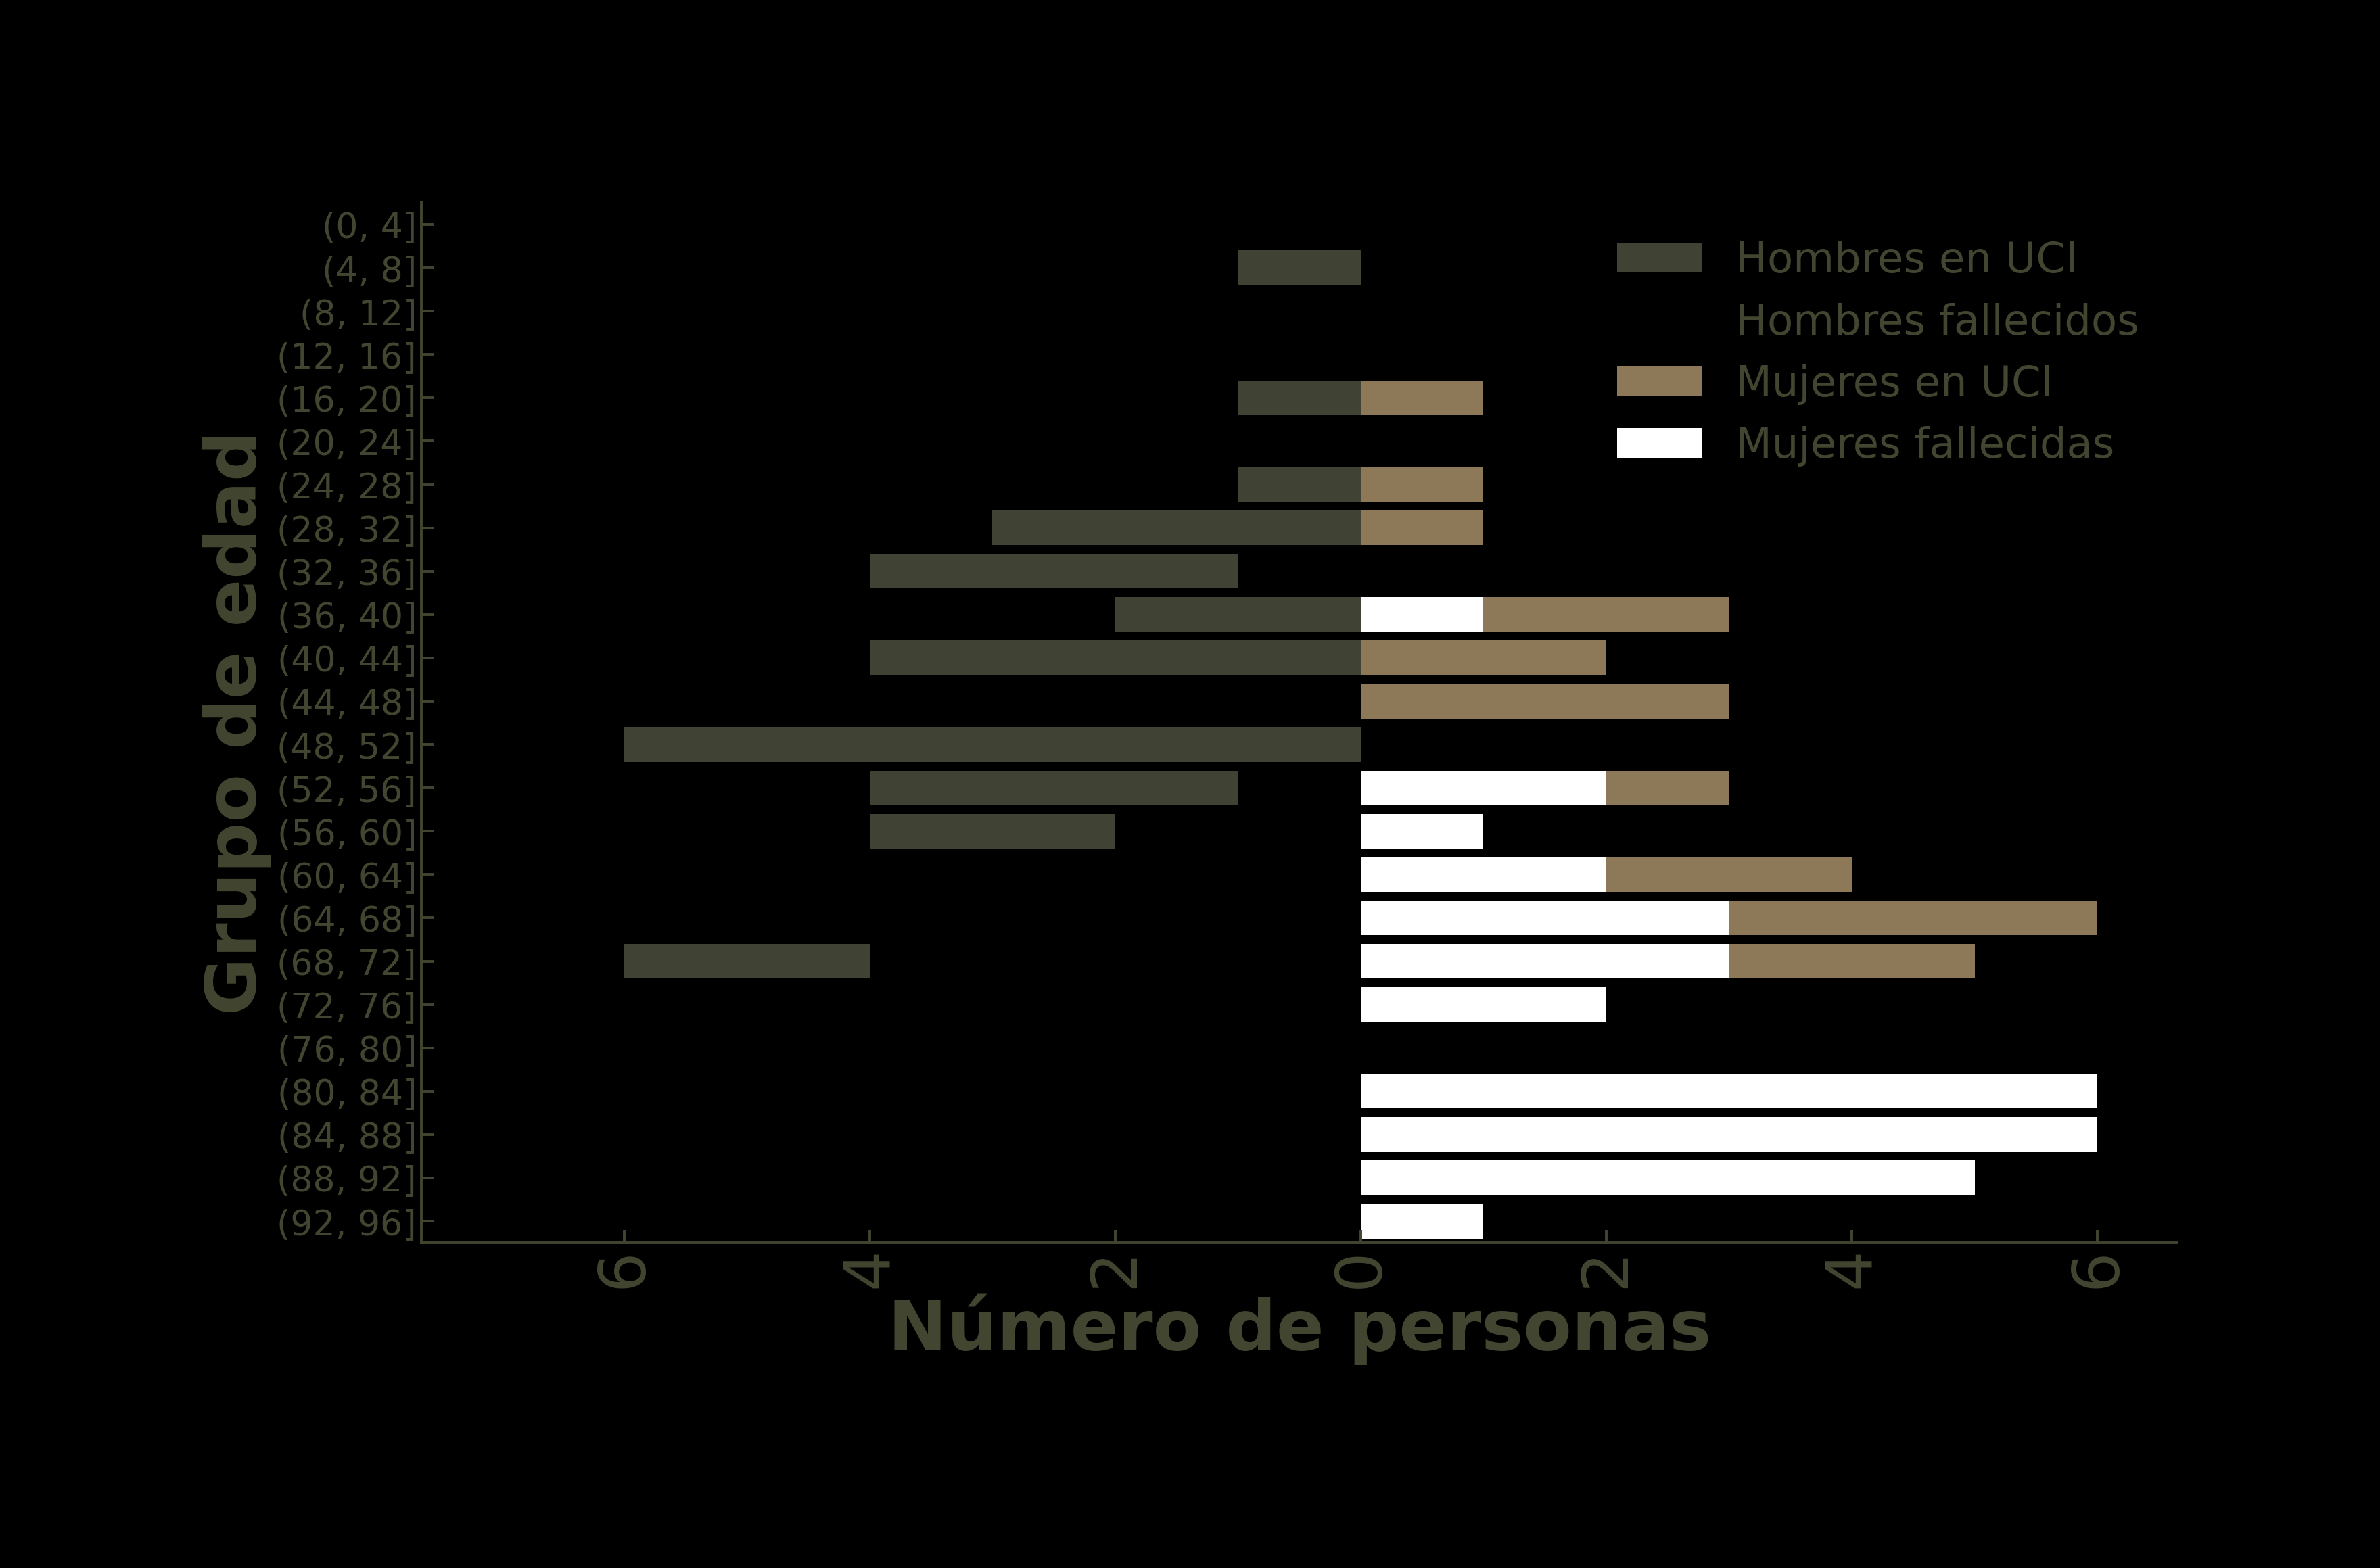

In [28]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x="Hombres en UCI",y="edad", color=color, label="Hombres en UCI",data = piramide)
ax = sns.barplot(x="Hombres fallecidos",y="edad", color="black", label="Hombres fallecidos",data = piramide)

ax = sns.barplot(x="Mujeres en UCI",y="edad", color="#967B4F", label="Mujeres en UCI",data = piramide)
ax = sns.barplot(x="Mujeres fallecidas",y="edad", color="white", label="Mujeres fallecidas",data = piramide)

plt.setp(ax.spines.values(), color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Número de personas", fontsize=50, color=color)
ax.set_ylabel("Grupo de edad", fontsize=50, color=color)


plt.xticks(fontsize=45)
plt.yticks(fontsize=25)

ax.set_xticklabels(np.abs(list(ax.get_xticks())).astype(int))
plt.legend(framealpha=0.0, fontsize=30)

plt.tight_layout()
plt.savefig(f'piramide_uci_muertes.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()

## Muertes por ciudad

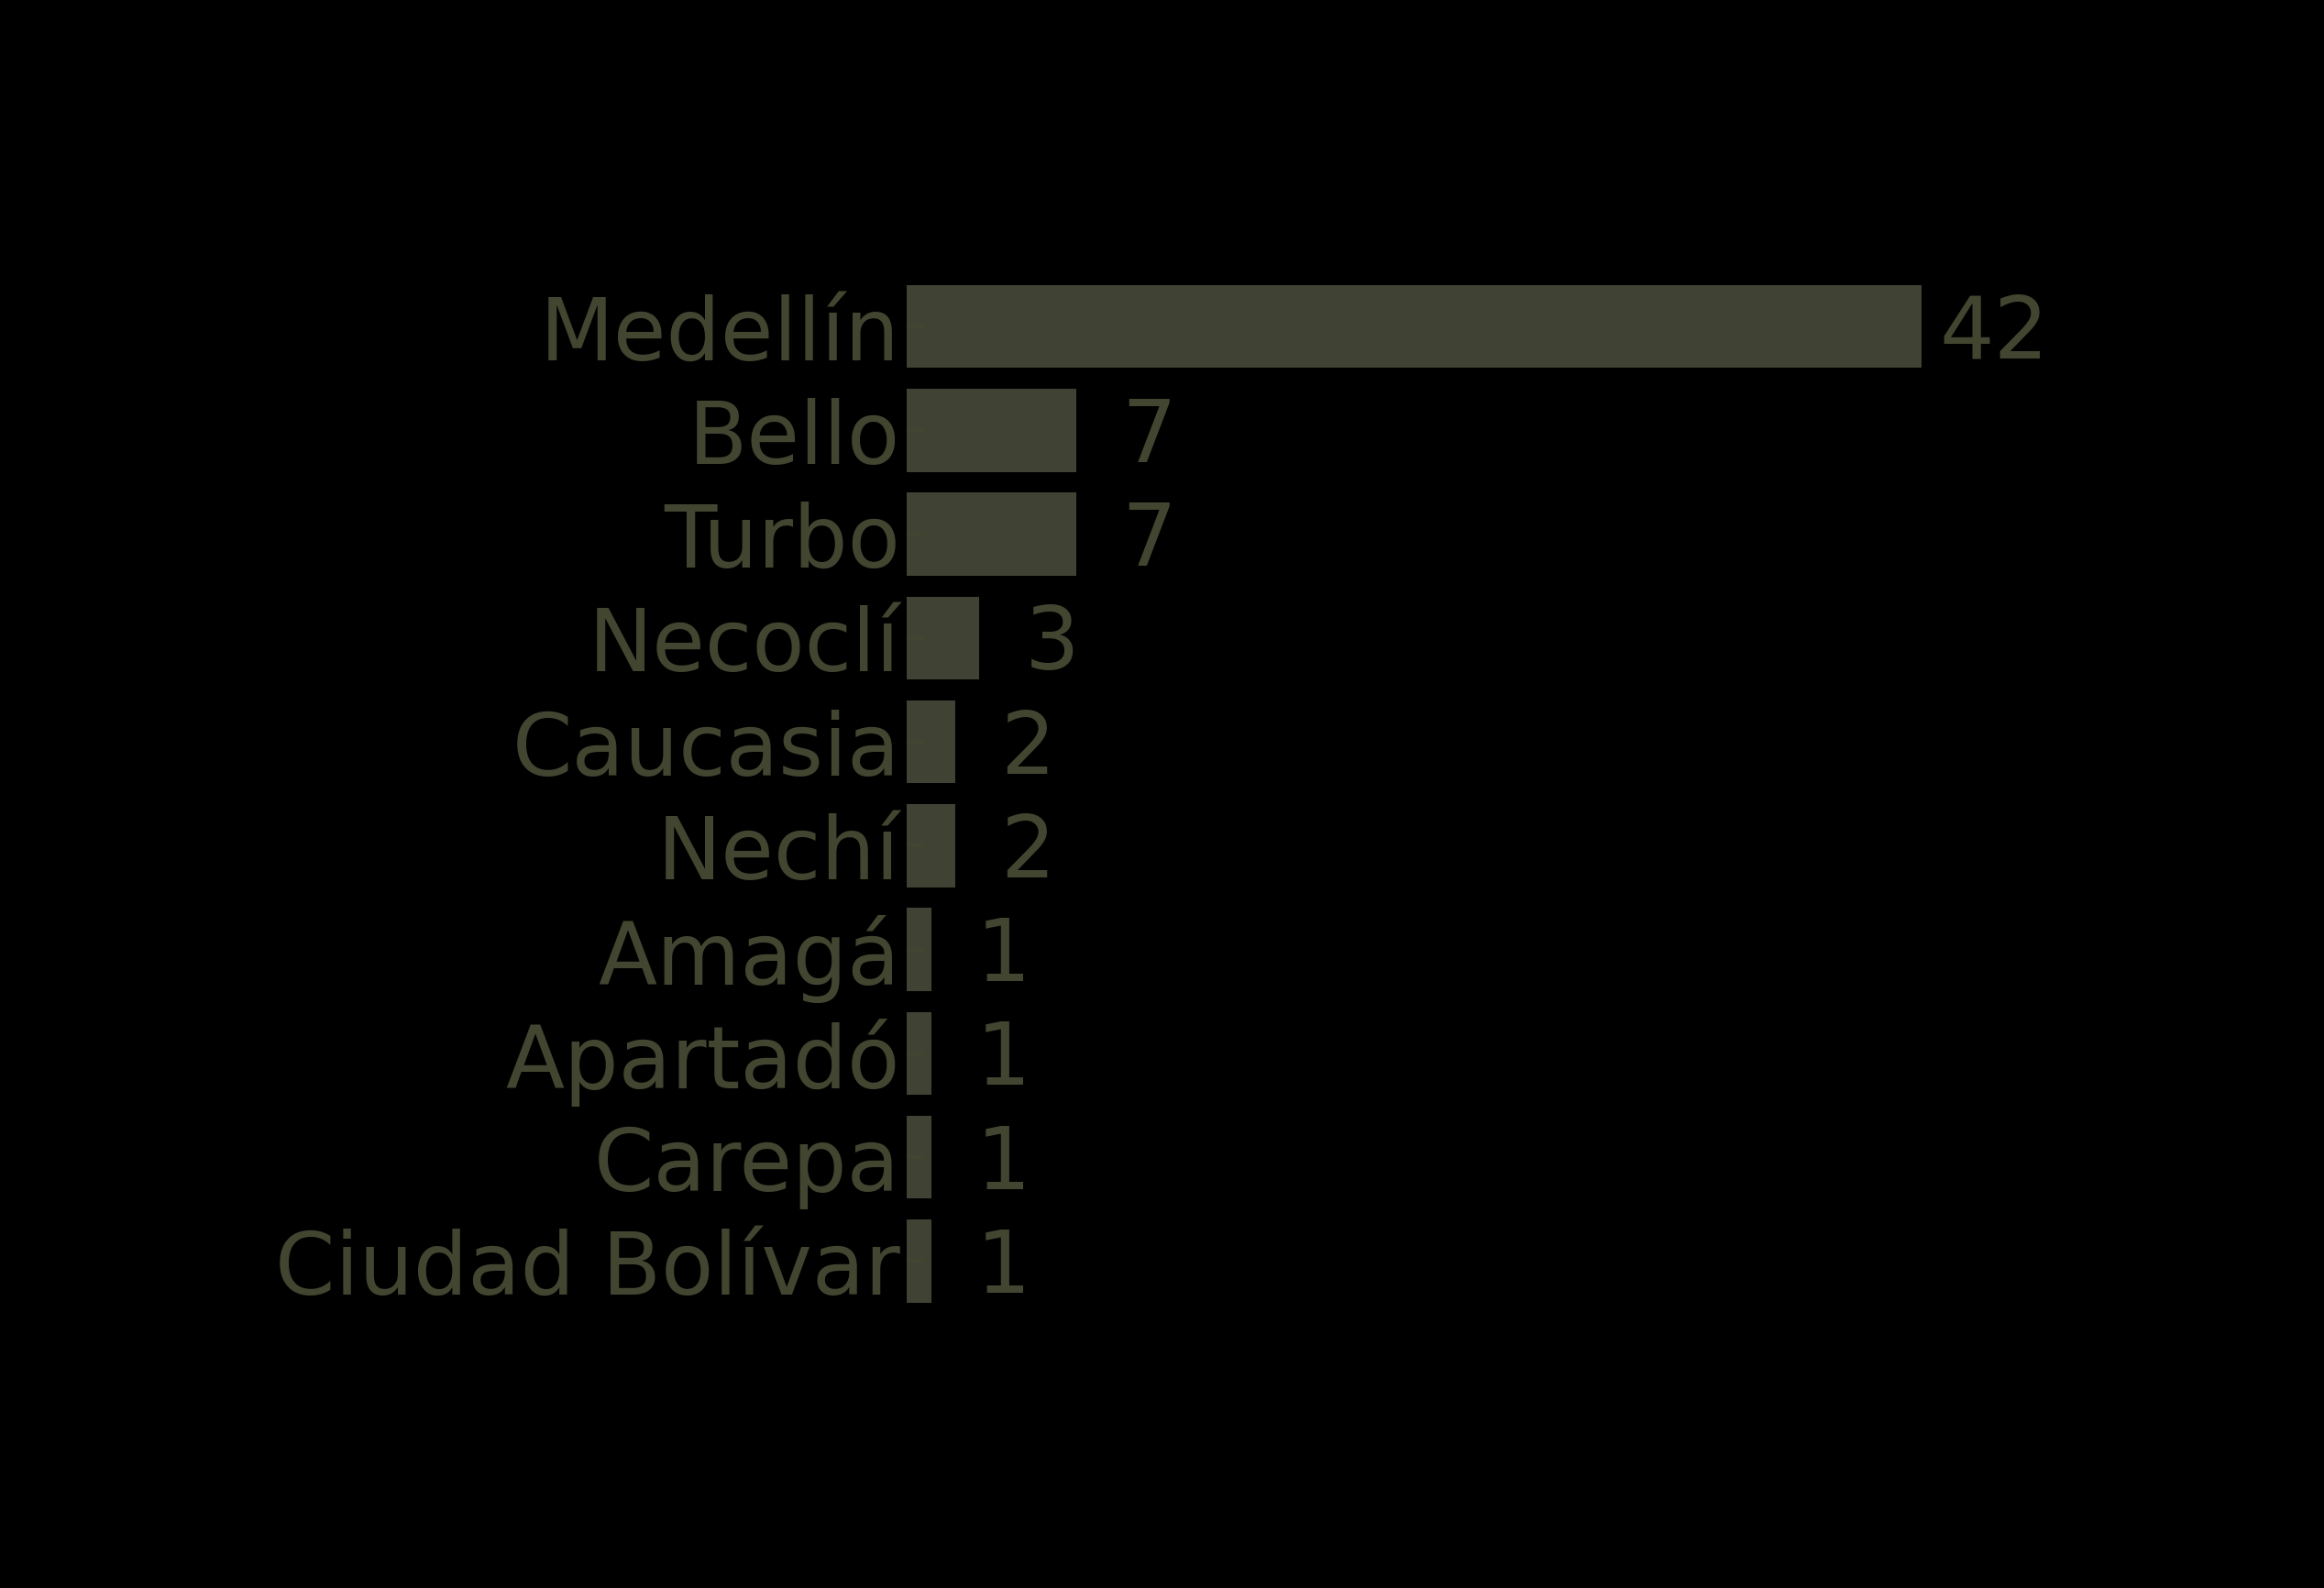

In [29]:
df_ant_muertes = df_ant[df_ant["fecha_de_muerte"].notnull()]
ciudades = df_ant_muertes.groupby("ciudad")["id_de_caso"].count().to_frame("cuenta").reset_index()
ciudades = ciudades.sort_values("cuenta", ascending=False).reset_index()
ax = sns.barplot(x = "cuenta", y="ciudad", data=ciudades.head(10), orient="h", color=color)

plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)

ax.tick_params(axis='y',which = "major", colors=color)



# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 3

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in ciudades.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color=color, 
            ha="center", 
            size=45)
    
plt.savefig(f'ciudades_antioquia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

# ratio muertes-contagio

In [30]:
ant_muertes = df_ant["fecha_de_muerte"].notnull().sum()
ant_tot = df_ant.shape[0]

col_muertes = df_col["fecha_de_muerte"].notnull().sum()
col_tot = df_col.shape[0]



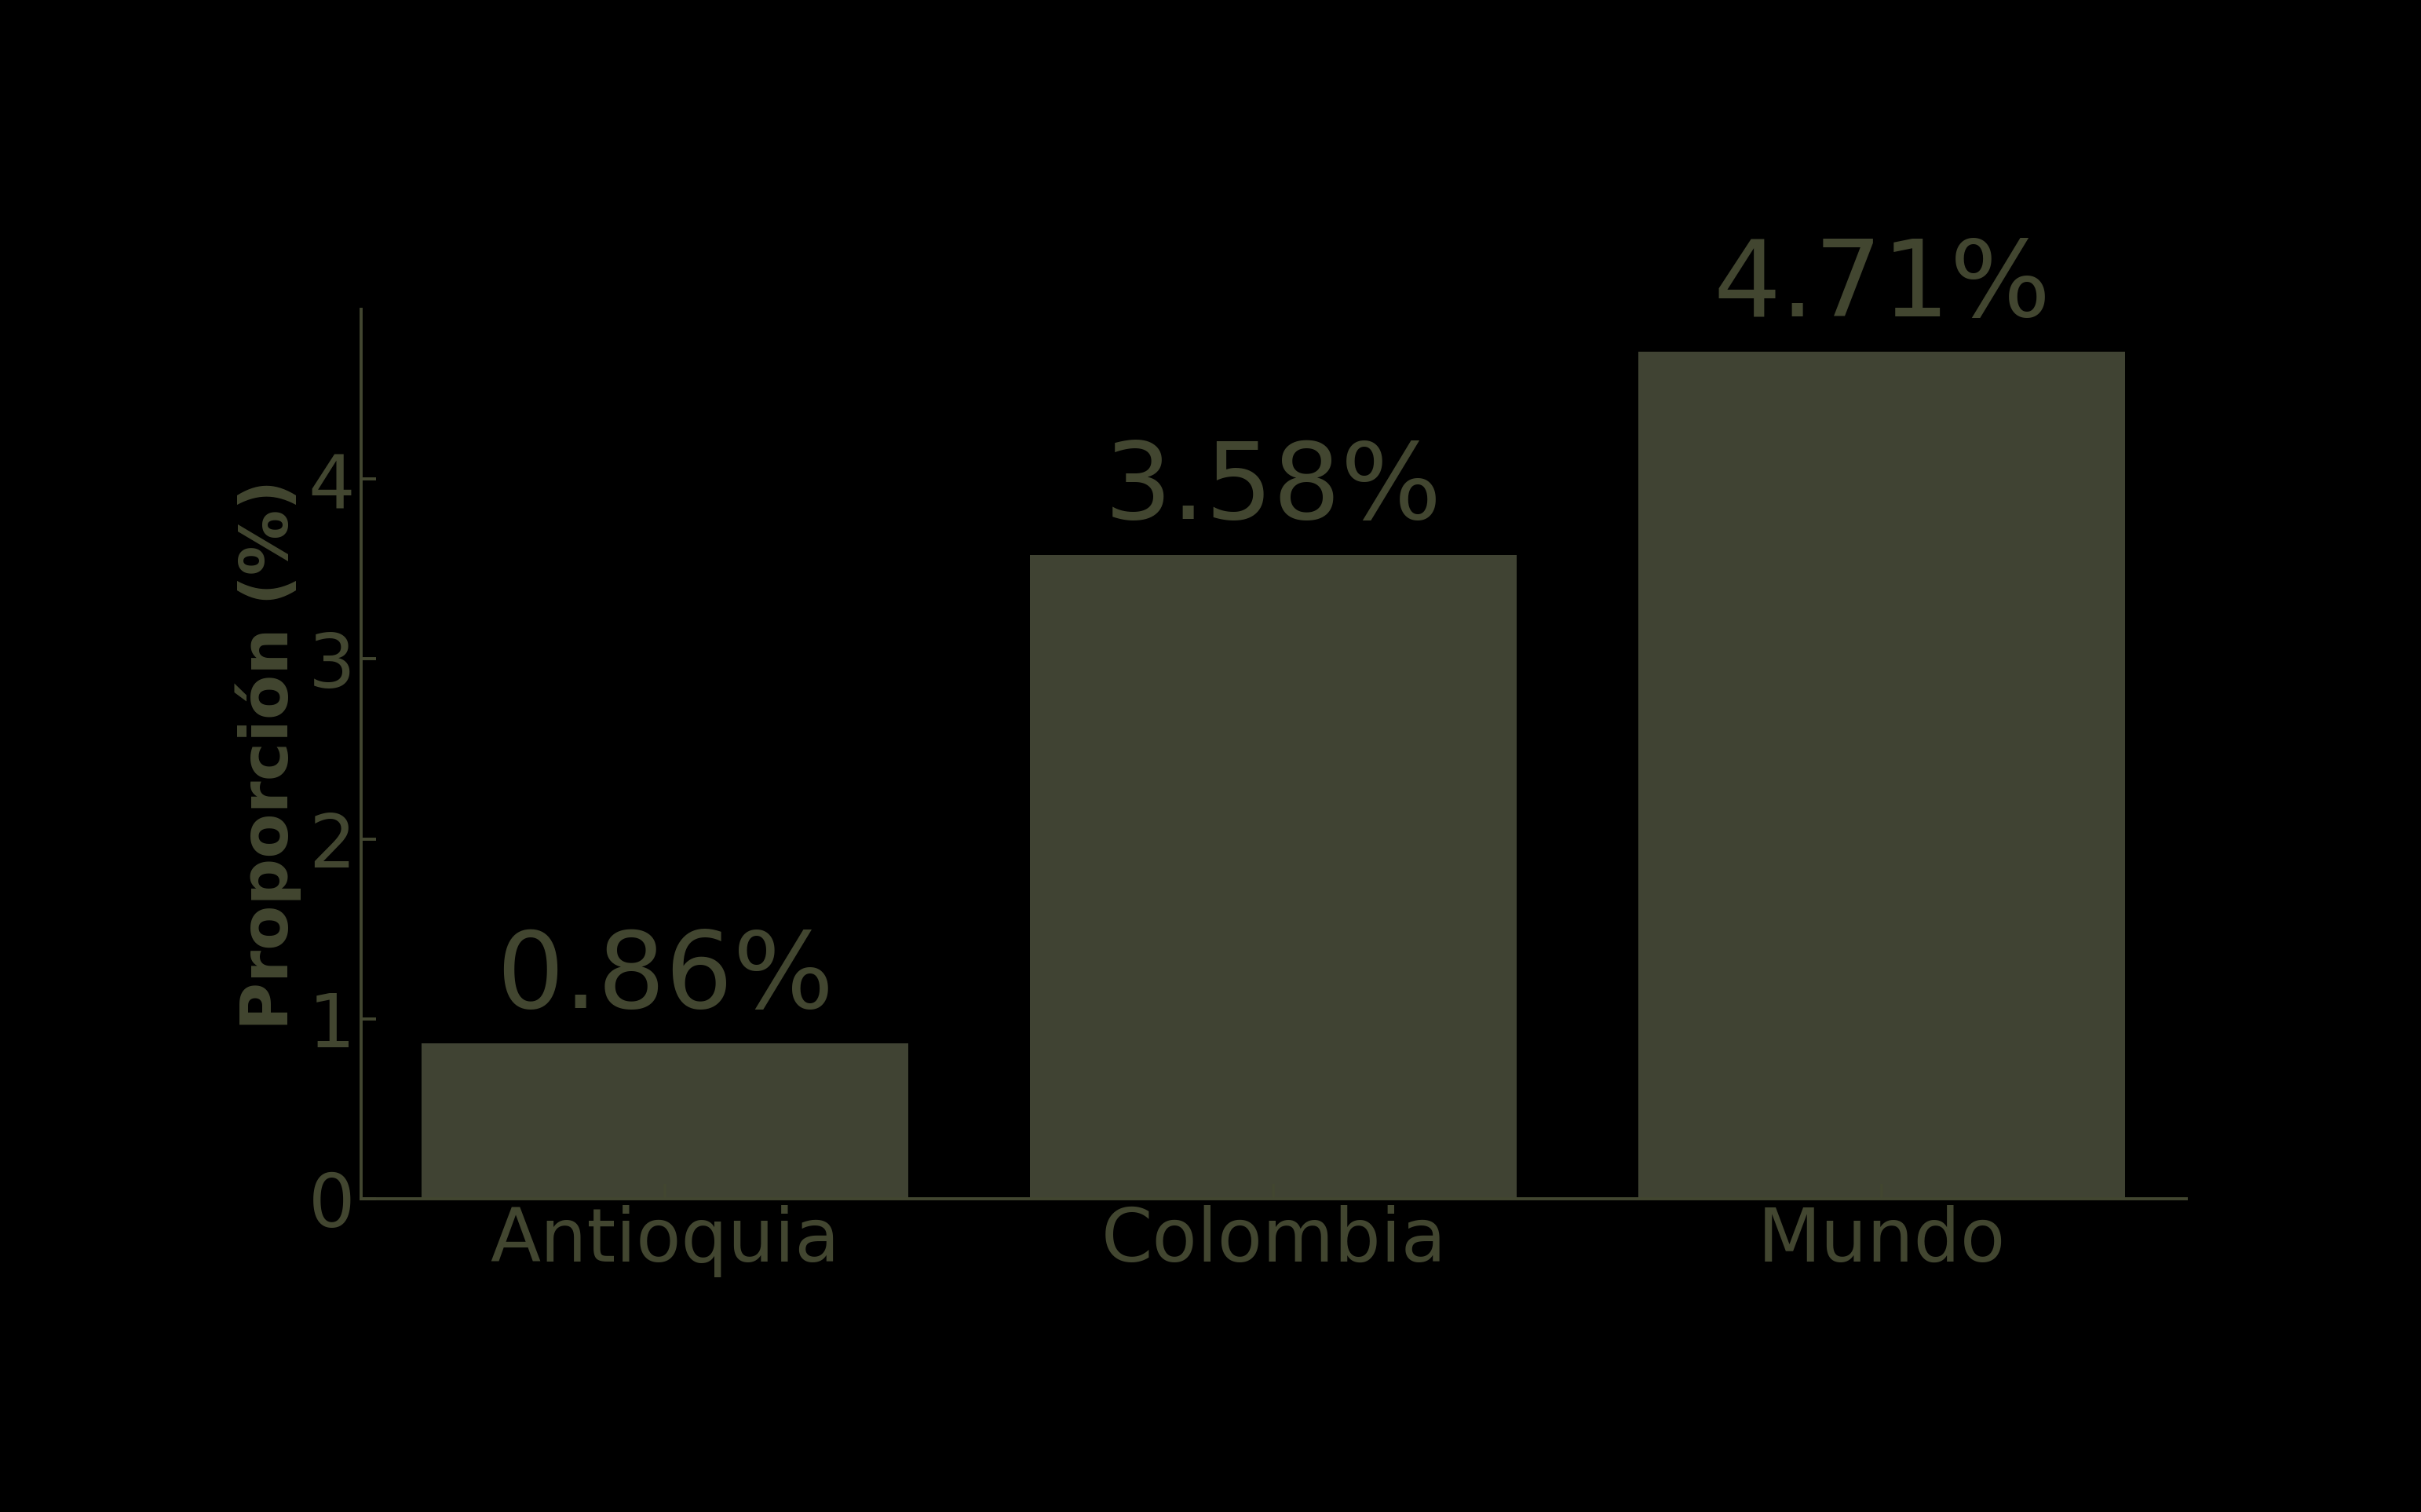

In [31]:
x = ["Antioquia", "Colombia", "Mundo"]
ant_rat = (ant_muertes/ant_tot) * 100
col_rat = (col_muertes/col_tot) * 100
world_rat = (532000/11300000) * 100
y = [ant_rat,col_rat,world_rat]
plt.figure(figsize=(20,10))
ax = sns.barplot(x = x, y=y, color=color)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=45)
ax.tick_params(axis='y', colors=color, labelsize=45)
plt.setp(ax.spines.values(), color=color)

ax.set_xlabel("", fontsize=50, color=color)
ax.set_ylabel("Proporción (%)", fontsize=40, color=color)


for fila, columna in enumerate(y):
    ax.text(fila + 0, columna+0.2, # posicion
            str(round(columna,2)) + "%", # texto
            color=color, 
            ha="center", 
            size=65)



plt.savefig(f'ratios.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Enias

In [32]:
df_ant.columns

Index(['id_de_caso', 'Fecha de notificacion', 'c_digo_divipola', 'ciudad',
       'departamento', 'atencion', 'edad', 'sexo', 'tipo', 'estado',
       'pa_s_de_procedencia', 'fis', 'Fecha de diagnóstico',
       'fecha_recuperado', 'fecha_reporte_web', 'tipo_recuperaci_n',
       'codigo_departamento', 'codigo_pais', 'pertenencia_etnica',
       'nombre_grupo_etnico', 'fecha_de_muerte', 'tiempo recuperacion',
       'tiempo muerte'],
      dtype='object')

In [33]:
df_ant["pertenencia_etnica"].value_counts()

Otro        3233
Negro        181
Indígena      46
Rom            7
Raizal         4
Name: pertenencia_etnica, dtype: int64

In [34]:
# fallecidos = df_ant[df_ant["fecha_de_muerte"].notnull()].loc[:,["id_de_caso", "ciudad", "edad", "sexo", "fecha_de_muerte", "tiempo muerte"]]
# ids_muertes = fallecidos["id_de_caso"].values
# ids_muertes

In [35]:
# muertos = df_boletines[df_boletines["Caso"].isin(ids_muertes)]
# rutas = {}
# rename_dict = {'Hospital':'H', 
#                "Fallecido":"F",
#                "En casa":"C",
#                "Casa": "C",
#                "Hospital UCI": "HU",
#                "Recuperado": "R",
#                "Recuperado (Hospital)": "RH",
#                } 
# for id_m in set(ids_muertes):
#     persona = muertos[muertos["Caso"] == int(id_m)]
#     persona["Ubicación"] = persona["Ubicación"].str.strip()
#     ubicaciones = persona["Ubicación"].values
#     res = [str(i[0]) for i in groupby(ubicaciones)]
#     res = (pd.Series(res)).map(rename_dict).values
#     rutas[id_m] = " - ".join(res)
#     rutas[id_m] = rutas[id_m] if rutas[id_m][-1]=="F" else rutas[id_m] + "- F"
# rutas_df = pd.DataFrame(rutas, index=[0]).T.reset_index().rename(columns={0:"ruta", "index":"id_de_caso"})


In [36]:
# fallecidos.merge(rutas_df, how="left", on="id_de_caso").drop("id_de_caso", axis=1).\
# rename(columns={"fecha_de_muerte":"Fecha de muerte", "tiempo muerte": "días enfermo"}).sort_values("Fecha de muerte")

## Capacidad UCI

In [37]:
capacidad = 624

In [38]:
uci

53

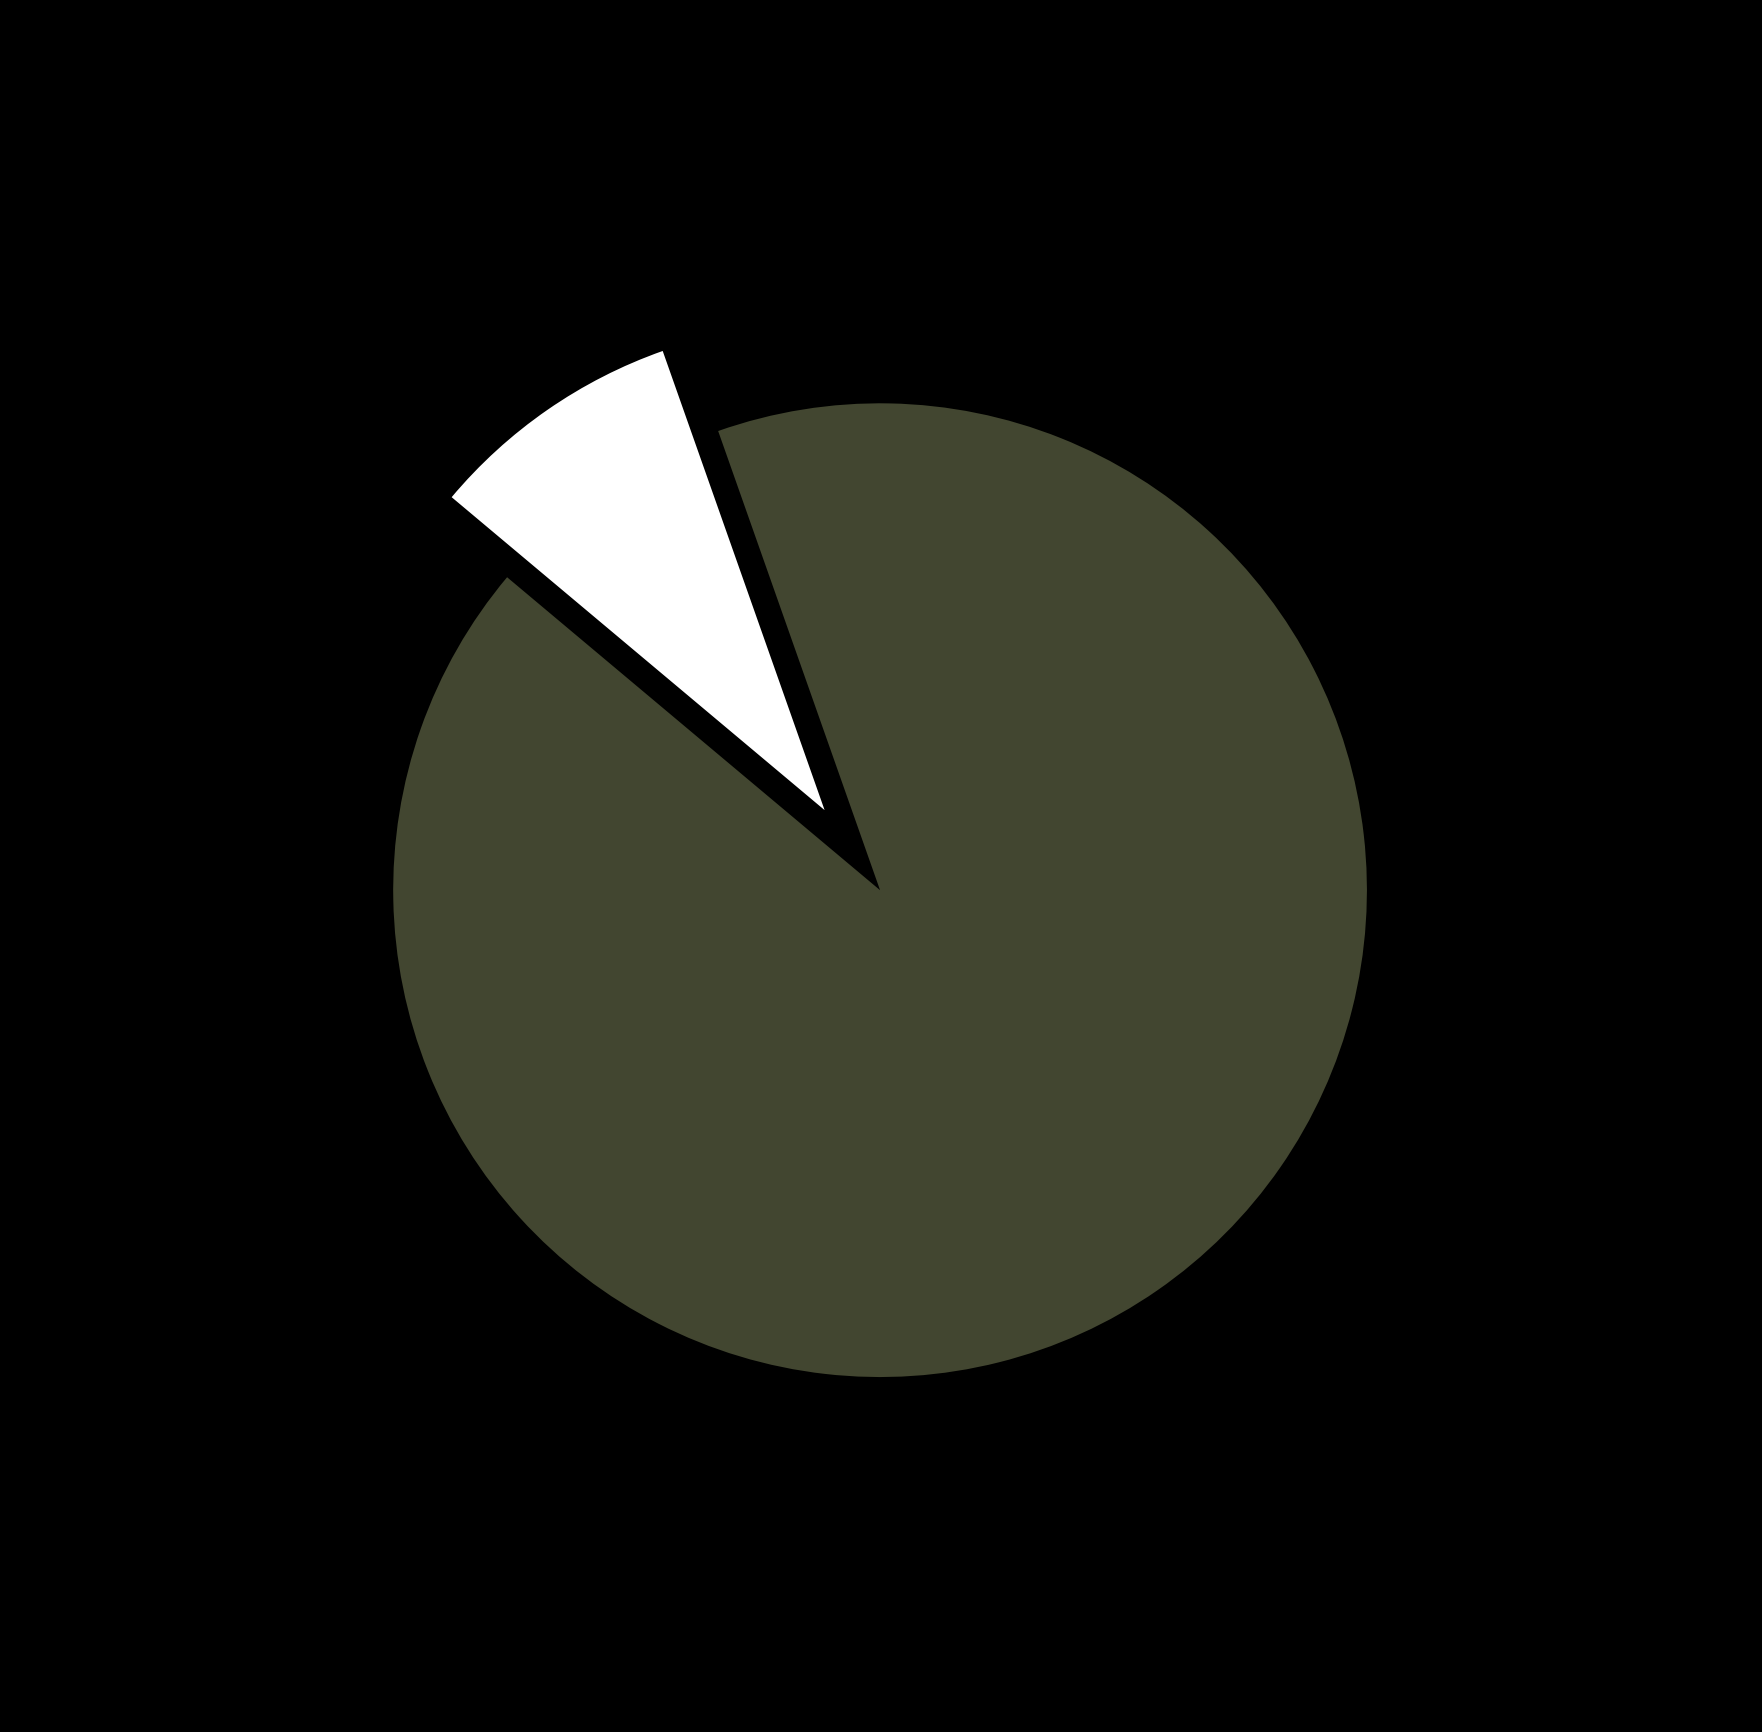

In [39]:
import matplotlib.pyplot as plt

# Data to plot
labels = '', ''
sizes = [capacidad-uci, uci]
colors = [color, "white"]
explode = (0, 0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140)

plt.axis('equal')

plt.savefig(f'instalada.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()



In [40]:
367+296+6+4+4

677

In [41]:
df_ant["atencion"].value_counts()

CASA            5252
RECUPERADO      2671
HOSPITAL         398
FALLECIDO         71
HOSPITAL UCI      53
N/A                6
Name: atencion, dtype: int64

In [42]:
df_ant["estado"].value_counts()

LEVE            7429
ASINTOMATICO     488
MODERADO         405
FALLECIDO         71
GRAVE             53
N/A                5
Name: estado, dtype: int64

In [43]:
df_ant

,id_de_caso,Fecha de notificacion,c_digo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,...,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,tiempo recuperacion,tiempo muerte
2,3,2020-03-07T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,50,F,IMPORTADO,LEVE,...,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,15.0,NaN
3,4,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,55,M,RELACIONADO,LEVE,...,2020-03-26,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,20.0,NaN
4,5,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,25,M,RELACIONADO,LEVE,...,2020-03-23,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,15.0,NaN
5,6,2020-03-10T00:00:00.000,05360,Itagüí,Antioquia,RECUPERADO,27,F,RELACIONADO,LEVE,...,2020-03-26,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,20.0,NaN
19,20,2020-03-11T00:00:00.000,05001,Medellín,Antioquia,RECUPERADO,26,F,RELACIONADO,LEVE,...,2020-03-24,2020-03-14,PCR,5,NaN,Otro,NaN,NaT,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137742,137783,2020-06-30T00:00:00.000,05001,Medellín,Antioquia,CASA,16,F,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
137751,137792,2020-07-03T00:00:00.000,05266,Envigado,Antioquia,CASA,35,M,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
137778,137819,2020-06-26T00:00:00.000,05212,Copacabana,Antioquia,CASA,13,F,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
137779,137820,2020-06-24T00:00:00.000,05045,Apartadó,Antioquia,CASA,26,F,EN ESTUDIO,LEVE,...,NaT,2020-07-10,NaN,5,NaN,NaN,NaN,NaT,NaN,NaN
